<a href="https://colab.research.google.com/github/armstrohiro/Research/blob/main/%E6%AD%A9%E8%A1%8C%E6%AF%94%E8%BC%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ユークリッド距離算出

In [ ]:
#ユークリッド距離を出力(一つずつ)
import pandas as pd
import numpy as np

# Load the uploaded CSV files
dlc_data_path = '/content/正解データ01.csv'
openpose_data_path = '/content/hrnet01.csv'

dlc_df = pd.read_csv(dlc_data_path)
openpose_df = pd.read_csv(openpose_data_path)

# Rename columns for clarity
dlc_df.columns = ['head_x', 'head_y','right_shoulder_x', 'right_shoulder_y','left_shoulder_x', 'left_shoulder_y', 'right_elbow_x', 'right_elbow_y','left_elbow_x', 'left_elbow_y','right_wrist_x', 'right_wrist_y',
                  'left_wrist_x', 'left_wrist_y','hip_x', 'hip_y','right_knee_x', 'right_knee_y','left_knee_x', 'left_knee_y','right_ankle_x', 'right_ankle_y', 'left_ankle_x', 'left_ankle_y',
                  'right_toe_x', 'right_toe_y','left_toe_x', 'left_toe_y']
openpose_df.columns =['head_x', 'head_y','right_shoulder_x', 'right_shoulder_y','left_shoulder_x', 'left_shoulder_y', 'right_elbow_x', 'right_elbow_y','left_elbow_x', 'left_elbow_y','right_wrist_x', 'right_wrist_y',
                  'left_wrist_x', 'left_wrist_y','hip_x', 'hip_y','right_knee_x', 'right_knee_y','left_knee_x', 'left_knee_y','right_ankle_x', 'right_ankle_y', 'left_ankle_x', 'left_ankle_y',
                  'right_toe_x', 'right_toe_y','left_toe_x', 'left_toe_y']

# Ensure both dataframes have the same number of rows
min_rows = min(dlc_df.shape[0], openpose_df.shape[0])
dlc_df = dlc_df.head(min_rows)
openpose_df = openpose_df.head(min_rows)

# Calculate Euclidean distances for each joint
distances = {}
joints = ['head', 'right_shoulder', 'left_shoulder', 'right_elbow', 'left_elbow',
          'right_wrist', 'left_wrist', 'hip', 'right_knee', 'left_knee',
          'right_ankle', 'left_ankle', 'right_toe', 'left_toe']

for joint in joints:
    dlc_x = dlc_df[f'{joint}_x']
    dlc_y = dlc_df[f'{joint}_y']
    openpose_x = openpose_df[f'{joint}_x']
    openpose_y = openpose_df[f'{joint}_y']

    distance = np.sqrt((dlc_x - openpose_x)**2 + (dlc_y - openpose_y)**2)
    distances[joint] = distance

# Convert distances to a DataFrame
distances_df = pd.DataFrame(distances)

# Save the distances to a new CSV file
output_csv_path = '/content/ユークリッド距離hn01.csv'
distances_df.to_csv(output_csv_path, index=False)

output_csv_path


'/content/ユークリッド距離hn01.csv'

In [ ]:
#ユークリッド距離まとめて出力
import pandas as pd
import numpy as np
import os

# 関節名のリスト
joints = ['head', 'right_shoulder', 'left_shoulder', 'right_elbow', 'left_elbow',
          'right_wrist', 'left_wrist', 'hip', 'right_knee', 'left_knee',
          'right_ankle', 'left_ankle', 'right_toe', 'left_toe']

# 処理するファイルのリスト
file_pairs = [
    ('/content/正解データ01.csv', '/content/hrnet01.csv'),
    ('/content/正解データ02.csv', '/content/hrnet02.csv'),  # 他のファイルペアも追加可能
    ('/content/正解データ03.csv', '/content/hrnet03.csv'),
    ('/content/正解データ04.csv', '/content/hrnet04.csv'),
    ('/content/正解データ05.csv', '/content/hrnet05.csv'),  # 他のファイルペアも追加可能
    ('/content/正解データ06.csv', '/content/hrnet06.csv'),
    ('/content/正解データ07.csv', '/content/hrnet07.csv'),
    ('/content/正解データ08.csv', '/content/hrnet08.csv'),  # 他のファイルペアも追加可能
    ('/content/正解データ09.csv', '/content/hrnet09.csv'),
    ('/content/正解データ10.csv', '/content/hrnet10.csv'),
    ('/content/正解データ12.csv', '/content/hrnet11.csv'),
    ('/content/正解データ12.csv', '/content/hrnet12.csv'),
    ('/content/正解データ13.csv', '/content/hrnet13.csv'),
    ('/content/正解データ14.csv', '/content/hrnet14.csv'),
    ('/content/正解データ15.csv', '/content/hrnet15.csv')
]

# ファイルごとに処理
for i, (dlc_data_path, openpose_data_path) in enumerate(file_pairs):
    dlc_df = pd.read_csv(dlc_data_path)
    openpose_df = pd.read_csv(openpose_data_path)

    # 列名を設定
    columns = ['head_x', 'head_y', 'right_shoulder_x', 'right_shoulder_y', 'left_shoulder_x', 'left_shoulder_y',
               'right_elbow_x', 'right_elbow_y', 'left_elbow_x', 'left_elbow_y', 'right_wrist_x', 'right_wrist_y',
               'left_wrist_x', 'left_wrist_y', 'hip_x', 'hip_y', 'right_knee_x', 'right_knee_y', 'left_knee_x', 'left_knee_y',
               'right_ankle_x', 'right_ankle_y', 'left_ankle_x', 'left_ankle_y', 'right_toe_x', 'right_toe_y', 'left_toe_x', 'left_toe_y']

    dlc_df.columns = columns
    openpose_df.columns = columns

    # 行数を揃える
    min_rows = min(dlc_df.shape[0], openpose_df.shape[0])
    dlc_df = dlc_df.head(min_rows)
    openpose_df = openpose_df.head(min_rows)

    # ユークリッド距離の計算
    distances = {}
    for joint in joints:
        dlc_x = dlc_df[f'{joint}_x']
        dlc_y = dlc_df[f'{joint}_y']
        openpose_x = openpose_df[f'{joint}_x']
        openpose_y = openpose_df[f'{joint}_y']

        distance = np.sqrt((dlc_x - openpose_x)**2 + (dlc_y - openpose_y)**2)
        distances[joint] = distance

    # 距離をDataFrameに変換
    distances_df = pd.DataFrame(distances)

    # 結果をCSVファイルとして保存
    output_csv_path = f'/content/ユークリッド距離hn{i+1:02}.csv'
    distances_df.to_csv(output_csv_path, index=False)
    print(f"Saved Euclidean distances to: {output_csv_path}")


Saved Euclidean distances to: /content/ユークリッド距離hn01.csv
Saved Euclidean distances to: /content/ユークリッド距離hn02.csv
Saved Euclidean distances to: /content/ユークリッド距離hn03.csv
Saved Euclidean distances to: /content/ユークリッド距離hn04.csv
Saved Euclidean distances to: /content/ユークリッド距離hn05.csv
Saved Euclidean distances to: /content/ユークリッド距離hn06.csv
Saved Euclidean distances to: /content/ユークリッド距離hn07.csv
Saved Euclidean distances to: /content/ユークリッド距離hn08.csv
Saved Euclidean distances to: /content/ユークリッド距離hn09.csv
Saved Euclidean distances to: /content/ユークリッド距離hn10.csv
Saved Euclidean distances to: /content/ユークリッド距離hn11.csv
Saved Euclidean distances to: /content/ユークリッド距離hn12.csv
Saved Euclidean distances to: /content/ユークリッド距離hn13.csv
Saved Euclidean distances to: /content/ユークリッド距離hn14.csv
Saved Euclidean distances to: /content/ユークリッド距離hn15.csv


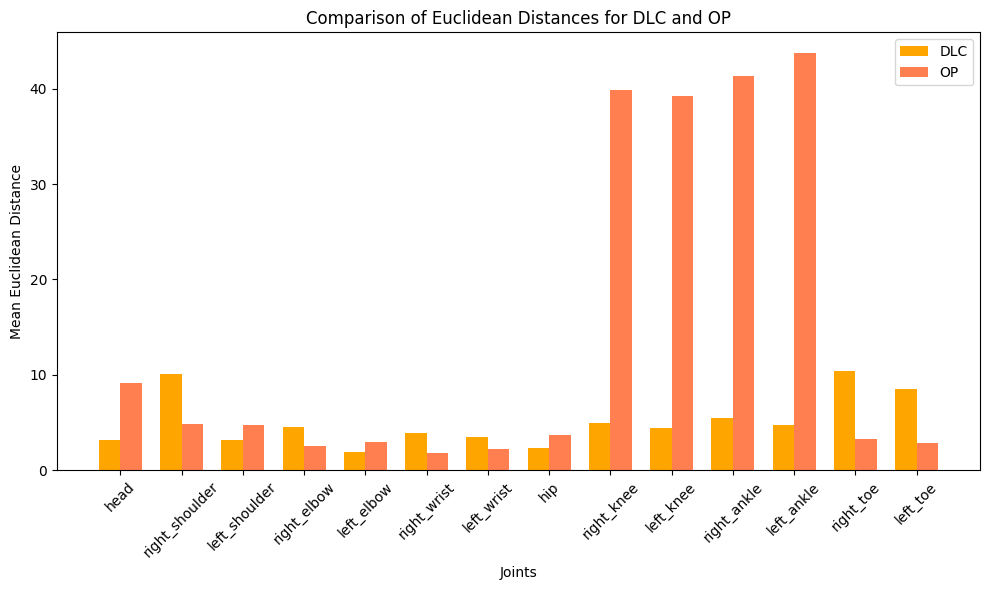

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV files
dlc_data_path = '/content/ユークリッド距離dlc.csv'
op_data_path = '/content/ユークリッド距離op.csv'

# Read the data into pandas DataFrames
dlc_df = pd.read_csv(dlc_data_path)
op_df = pd.read_csv(op_data_path)

# Remove any non-numeric or irrelevant columns from the OpenPose DataFrame
op_df = op_df.drop(columns=['Unnamed: 14'], errors='ignore')

# Calculate the mean Euclidean distances for each joint in both datasets
dlc_means = dlc_df.mean()
op_means = op_df.mean()

# Create a bar plot to compare the Euclidean distances between DLC and OpenPose
plt.figure(figsize=(10, 6))
index = dlc_means.index

bar_width = 0.35
index_range = range(len(index))

plt.bar(index_range, dlc_means, bar_width, label='DLC', color='orange')
plt.bar([i + bar_width for i in index_range], op_means, bar_width, label='OP', color='coral')

plt.xlabel('Joints')
plt.ylabel('Mean Euclidean Distance')
plt.title('Comparison of Euclidean Distances for DLC and OP')
plt.xticks([i + bar_width / 2 for i in index_range], index, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

# MAE

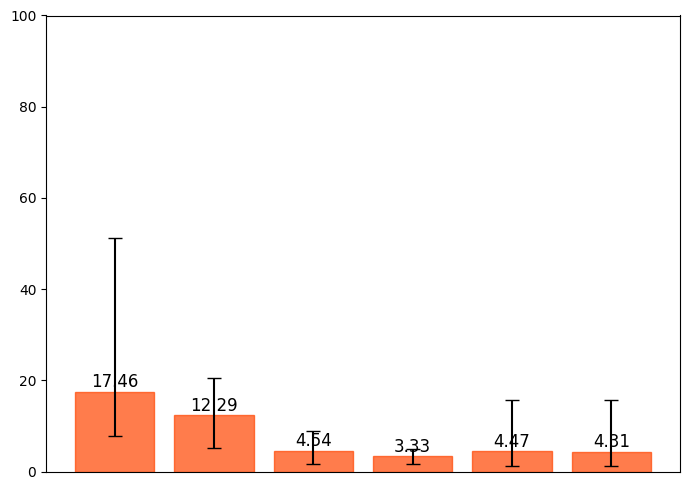

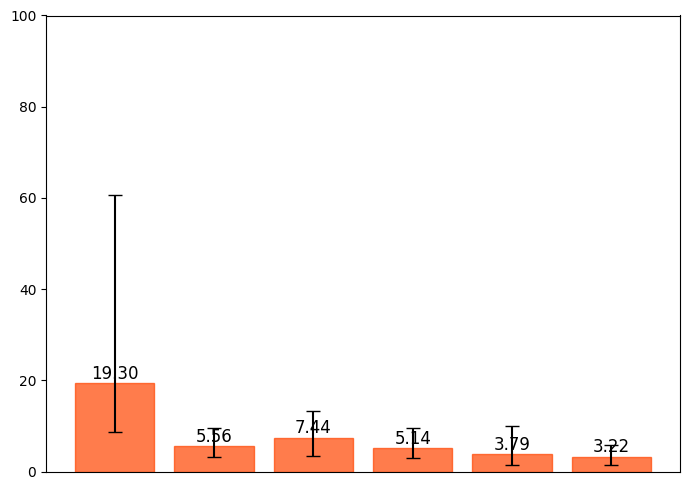

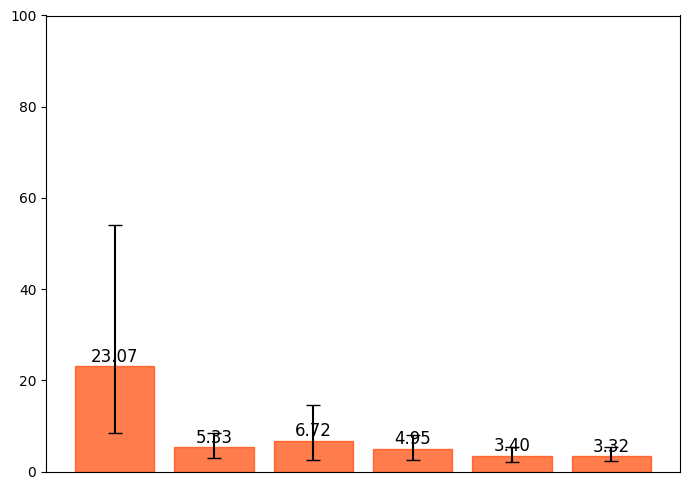

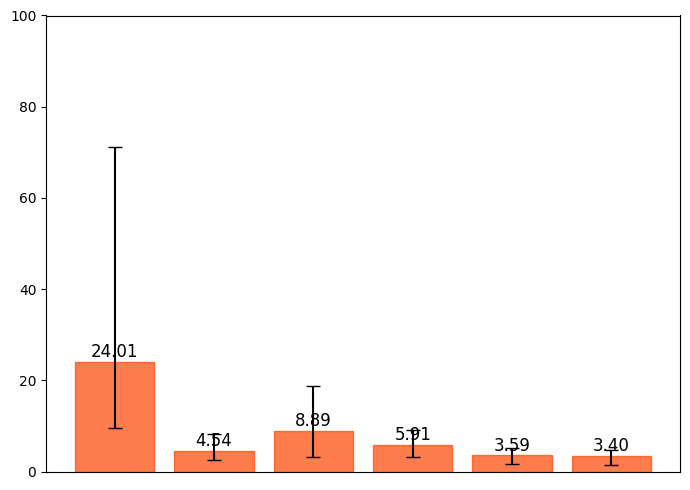

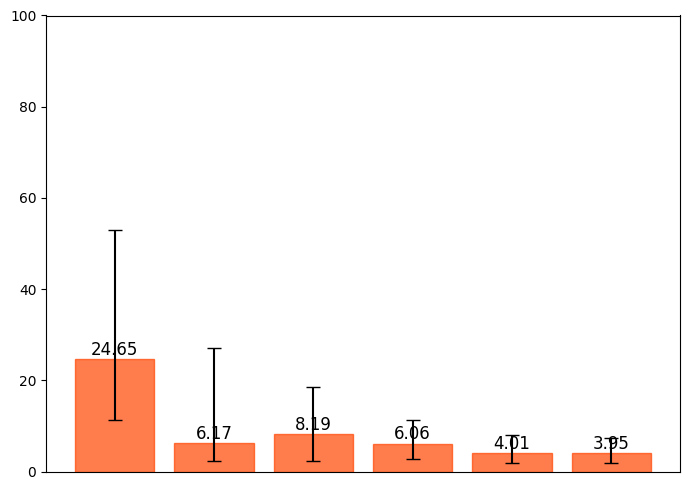

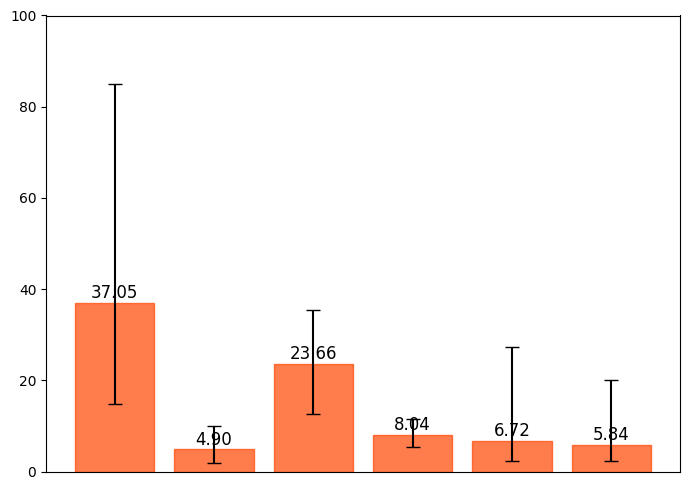

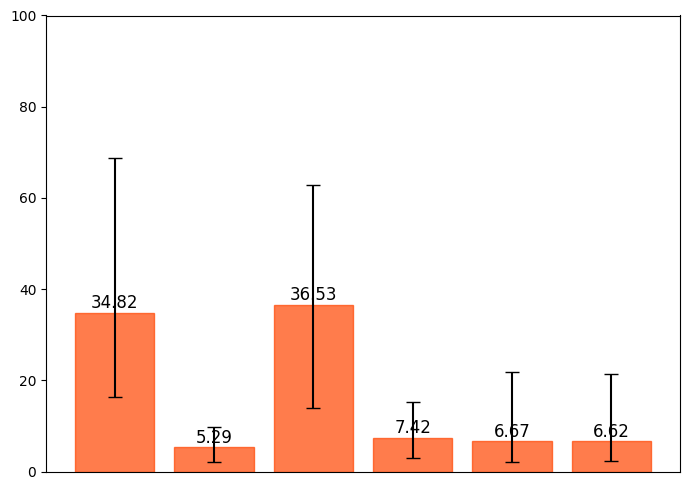

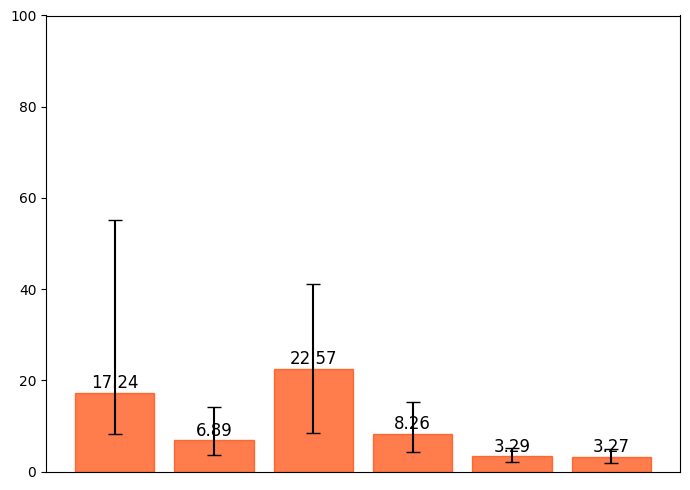

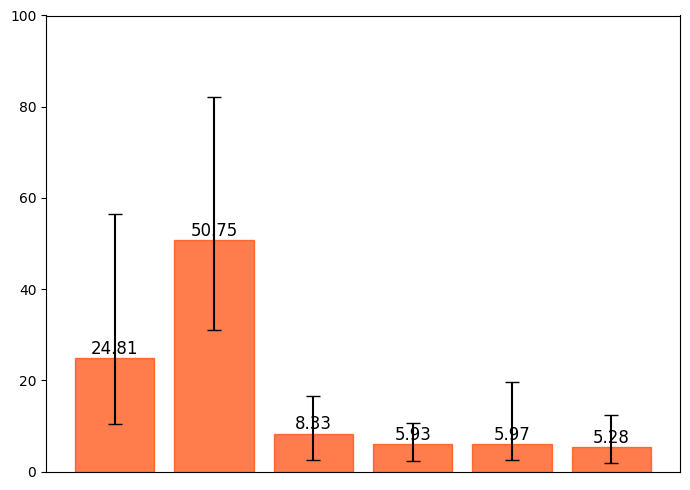

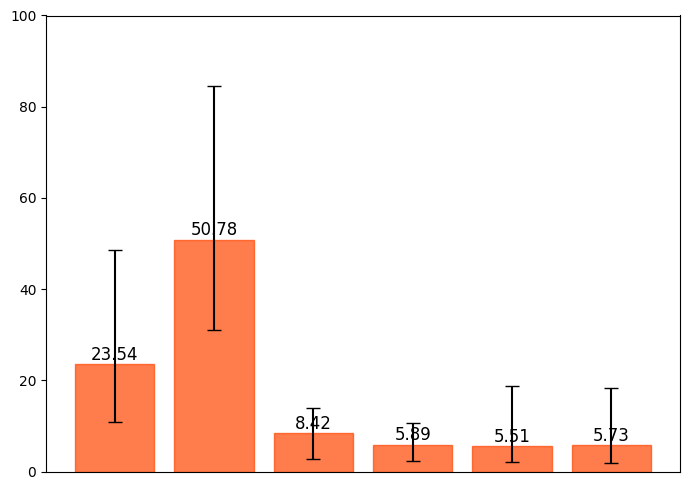

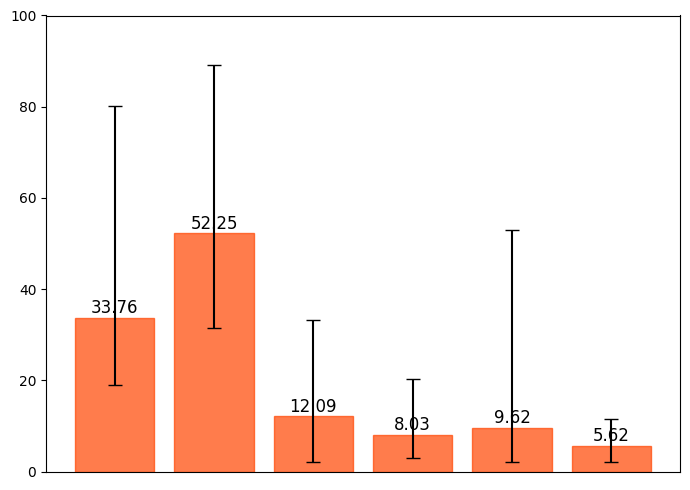

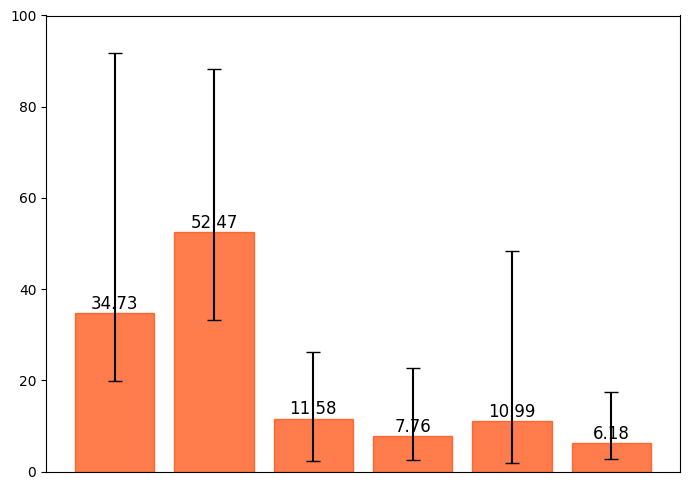

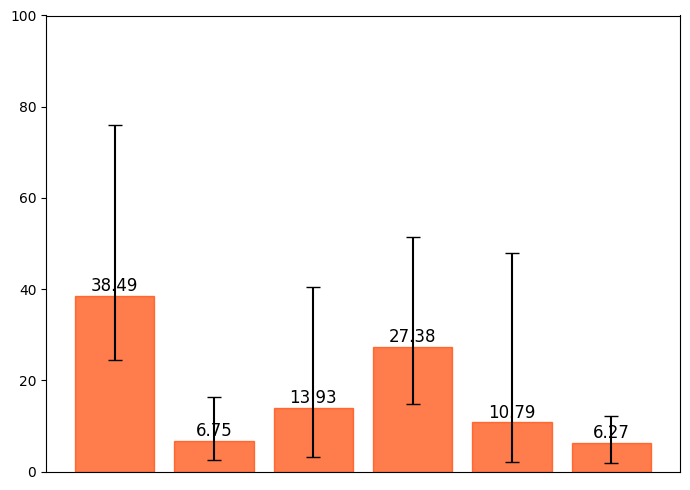

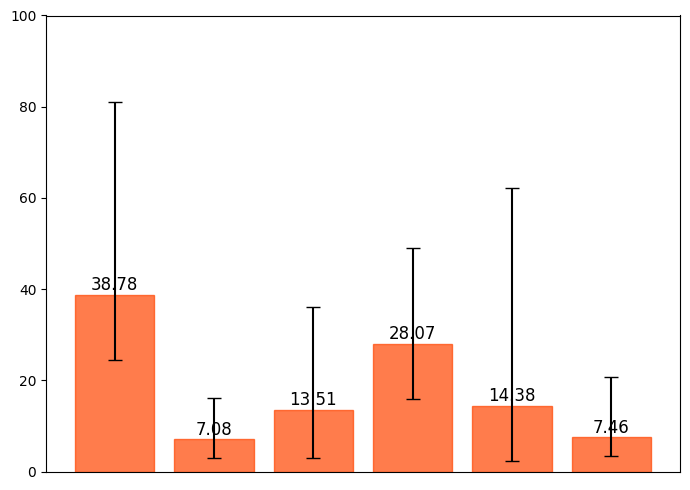

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the provided CSV files
op_data = pd.read_csv('/content/OP.csv')
dlc_data = pd.read_csv('/content/DLC.csv')
dlc_fl_data = pd.read_csv('/content/DLC_FL.csv')
mp_data = pd.read_csv('/content/MP.csv')
d2_data = pd.read_csv('/content/D2.csv')
hn_data = pd.read_csv('/content/HN.csv')


# Extract the column names (joint names)
joints = op_data.columns

# Initialize dictionaries to hold MAE statistics for each model
models = ['HN', 'OP', 'MP', 'D2', 'DLC', 'DLCFL']
mae_stats = {model: {'mean': [], 'min': [], 'max': []} for model in models}

# Calculate the mean, min, and max MAE for each joint across the models
for joint in joints:

    mae_stats['HN']['mean'].append(hn_data[joint].mean())
    mae_stats['HN']['min'].append(hn_data[joint].min())
    mae_stats['HN']['max'].append(hn_data[joint].max())

    mae_stats['OP']['mean'].append(op_data[joint].mean())
    mae_stats['OP']['min'].append(op_data[joint].min())
    mae_stats['OP']['max'].append(op_data[joint].max())

    mae_stats['MP']['mean'].append(mp_data[joint].mean())
    mae_stats['MP']['min'].append(mp_data[joint].min())
    mae_stats['MP']['max'].append(mp_data[joint].max())

    mae_stats['D2']['mean'].append(d2_data[joint].mean())
    mae_stats['D2']['min'].append(d2_data[joint].min())
    mae_stats['D2']['max'].append(d2_data[joint].max())

    mae_stats['DLC']['mean'].append(dlc_data[joint].mean())
    mae_stats['DLC']['min'].append(dlc_data[joint].min())
    mae_stats['DLC']['max'].append(dlc_data[joint].max())

    mae_stats['DLCFL']['mean'].append(dlc_fl_data[joint].mean())
    mae_stats['DLCFL']['min'].append(dlc_fl_data[joint].min())
    mae_stats['DLCFL']['max'].append(dlc_fl_data[joint].max())

# Plotting each joint as a separate bar graph with error bars
for i, joint in enumerate(joints):
    # Collect mean, min, and max values for the specific joint
    means = [mae_stats[model]['mean'][i] for model in models]
    mins = [mae_stats[model]['min'][i] for model in models]
    maxs = [mae_stats[model]['max'][i] for model in models]

    # Calculate error bars (difference between mean and min/max)
    lower_errors = [mean - min_val for mean, min_val in zip(means, mins)]
    upper_errors = [max_val - mean for mean, max_val in zip(means, maxs)]

    # Create a new figure for each joint
    plt.figure(figsize=(7, 5))
    plt.bar(models, means, yerr=[lower_errors, upper_errors], capsize=5, color='orangered', edgecolor='orangered', alpha=0.7)

    # Add data labels
    for j, value in enumerate(means):
        plt.text(j, value + 1, f'{value:.2f}', ha='center', fontsize=12, color='black')

    # Graph titles and labels
    plt.xticks([])
    #plt.title(f'MAE ({joint})', fontsize=14)
    #plt.ylabel('MAE (pixels)', fontsize=12)
    plt.ylim(0, 100)  # Set all y-axes to range 0 to 90

    # Show the plot
    plt.tight_layout()
    plt.show()

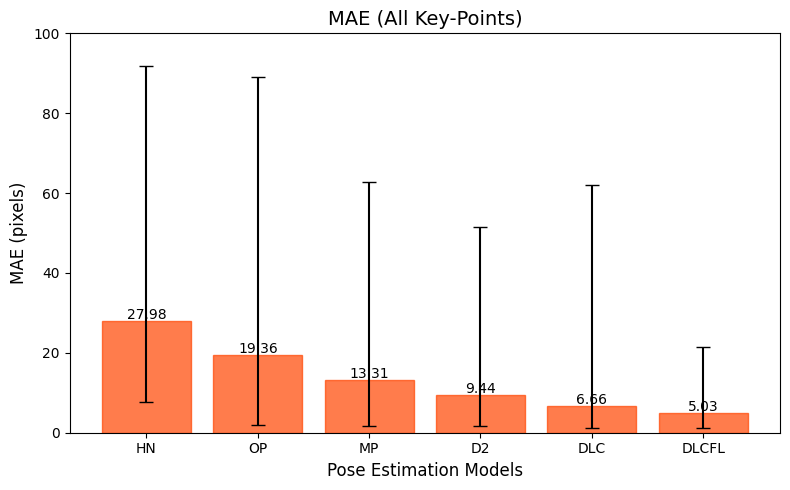

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the provided CSV files
op_data = pd.read_csv('/content/OP.csv')
dlc_data = pd.read_csv('/content/DLC.csv')
dlc_fl_data = pd.read_csv('/content/DLC_FL.csv')
mp_data = pd.read_csv('/content/MP.csv')
d2_data = pd.read_csv('/content/D2.csv')
hn_data = pd.read_csv('/content/HN.csv')

# Extract the column names (joint names)
joints = op_data.columns

# Calculate the mean, min, and max MAE for each model across all joints
def calculate_mae_stats(data):
    mean_mae = data.mean(axis=0).mean()  # Mean across all joints
    min_mae = data.min(axis=0).min()    # Min across all joints
    max_mae = data.max(axis=0).max()    # Max across all joints
    return mean_mae, min_mae, max_mae

hn_mean_mae, hn_min_mae, hn_max_mae = calculate_mae_stats(hn_data)
op_mean_mae, op_min_mae, op_max_mae = calculate_mae_stats(op_data)
mp_mean_mae, mp_min_mae, mp_max_mae = calculate_mae_stats(mp_data)
d2_mean_mae, d2_min_mae, d2_max_mae = calculate_mae_stats(d2_data)
dlc_mean_mae, dlc_min_mae, dlc_max_mae = calculate_mae_stats(dlc_data)
dlc_fl_mean_mae, dlc_fl_min_mae, dlc_fl_max_mae = calculate_mae_stats(dlc_fl_data)

# Collect statistics for each model
models = ['HN', 'OP', 'MP', 'D2', 'DLC', 'DLCFL']
mean_mae_values =[hn_mean_mae, op_mean_mae,  mp_mean_mae, d2_mean_mae, dlc_mean_mae, dlc_fl_mean_mae]
min_mae_values = [hn_min_mae, op_min_mae,  mp_min_mae, d2_min_mae, dlc_min_mae, dlc_fl_min_mae]
max_mae_values = [hn_max_mae, op_max_mae, mp_max_mae, d2_max_mae, dlc_max_mae, dlc_fl_max_mae]

# Calculate error bars
lower_errors = [mean - min_val for mean, min_val in zip(mean_mae_values, min_mae_values)]
upper_errors = [max_val - mean for mean, max_val in zip(mean_mae_values, max_mae_values)]

# Create a summary plot for the overall mean MAE across all joints
plt.figure(figsize=(8, 5))
plt.bar(models, mean_mae_values, yerr=[lower_errors, upper_errors], capsize=5, color='orangered', edgecolor='orangered', alpha=0.7)

# Add text labels for each bar
for i, value in enumerate(mean_mae_values):
    plt.text(i, value + 0.5, f'{value:.2f}', ha='center', fontsize=10, color='black')

# Graph titles and labels
plt.title('MAE (All Key-Points)', fontsize=14)
plt.xlabel('Pose Estimation Models', fontsize=12)
plt.ylabel('MAE (pixels)', fontsize=12)
plt.ylim(0, max(max_mae_values) + 5)  # Adjust the y-axis range as needed
plt.ylim(0, 100)

# Show the plot
plt.tight_layout()
plt.show()

# Bland-Altman結果

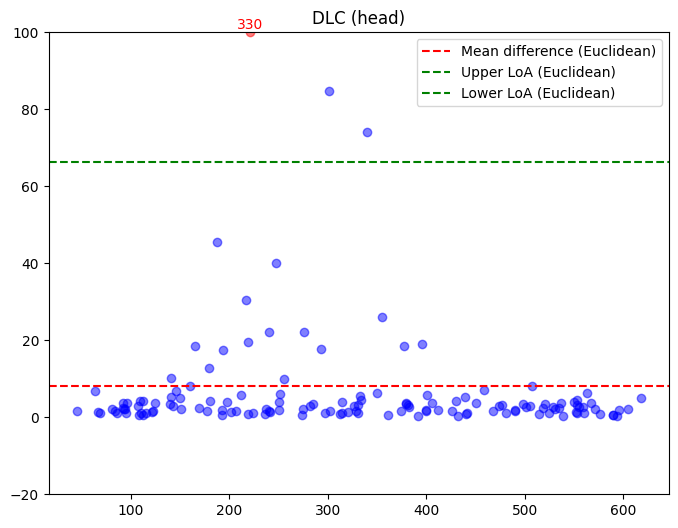

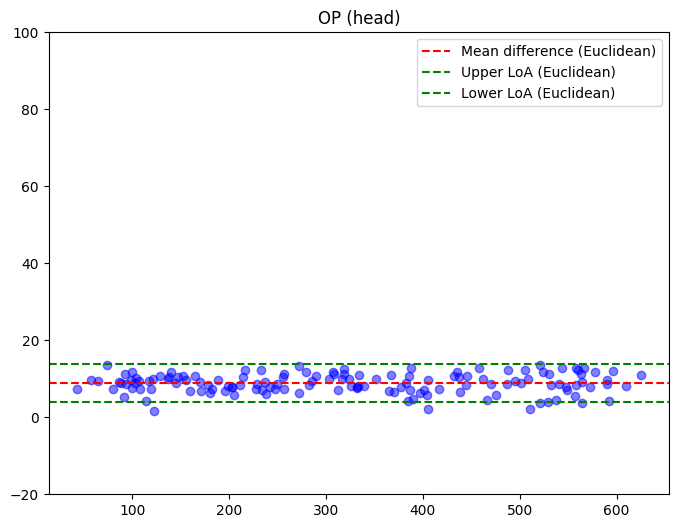

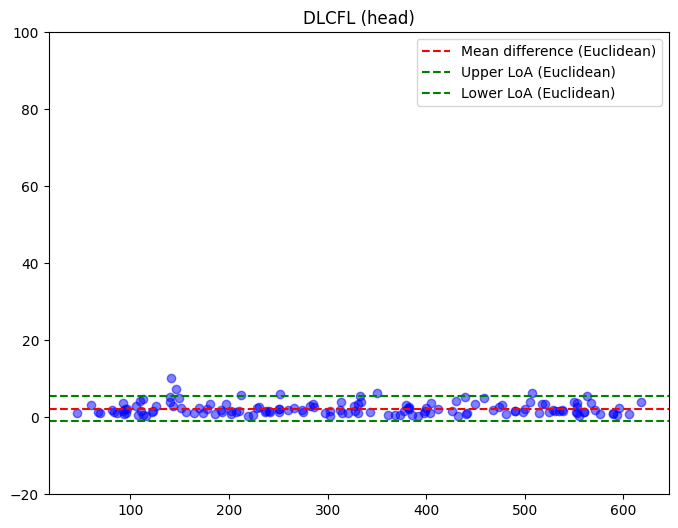

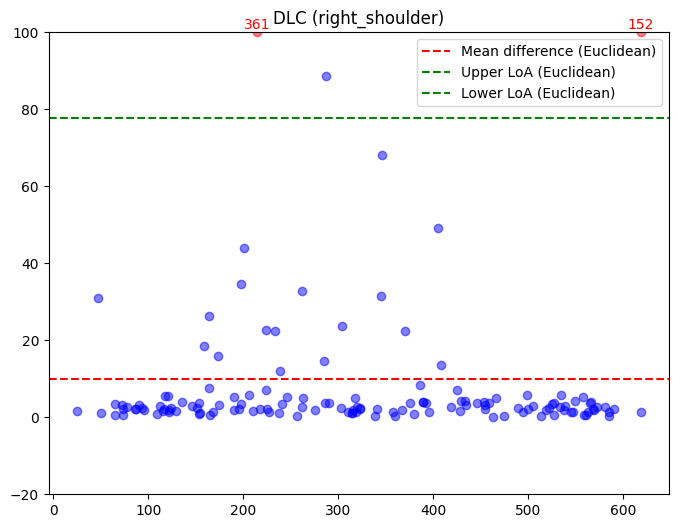

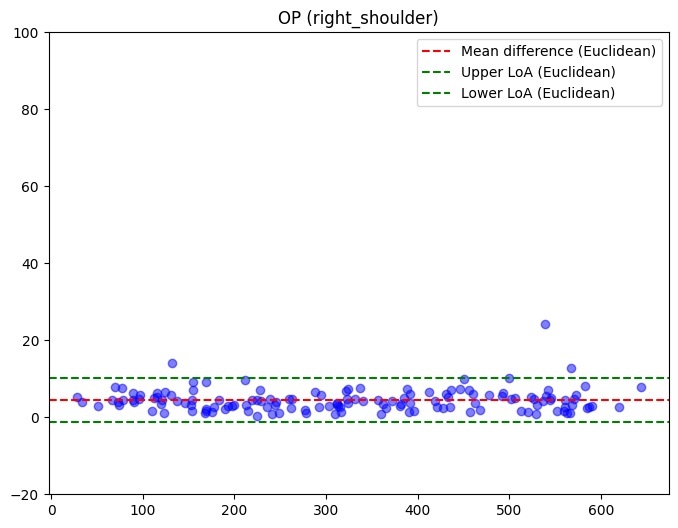

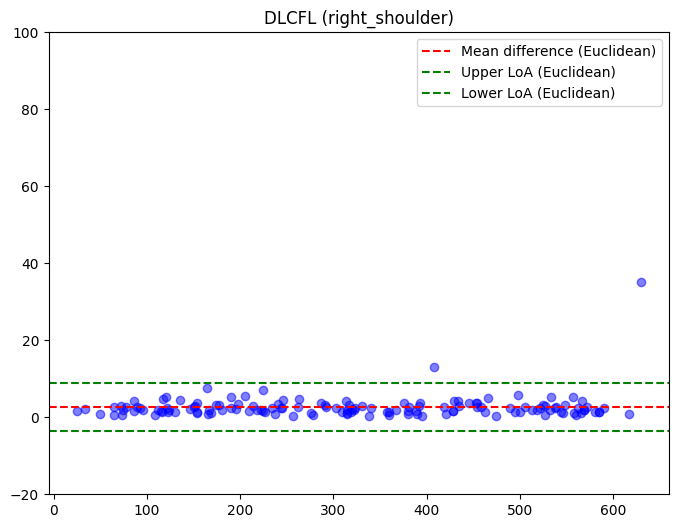

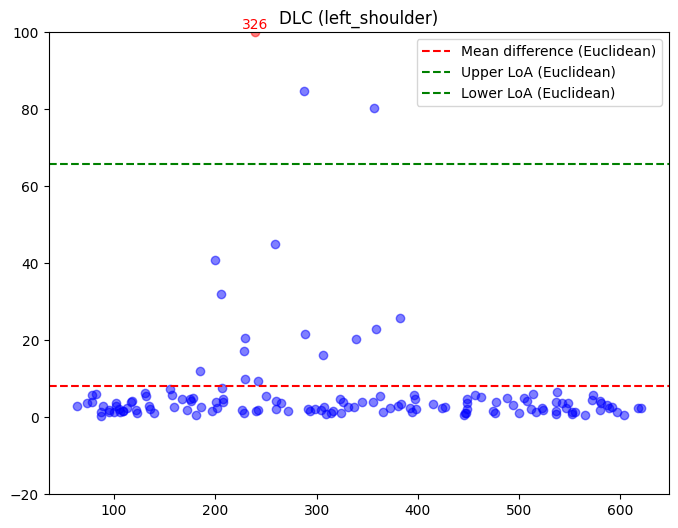

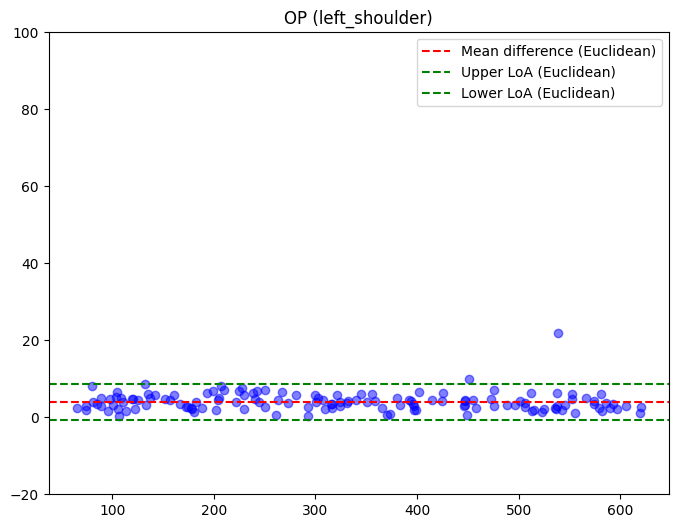

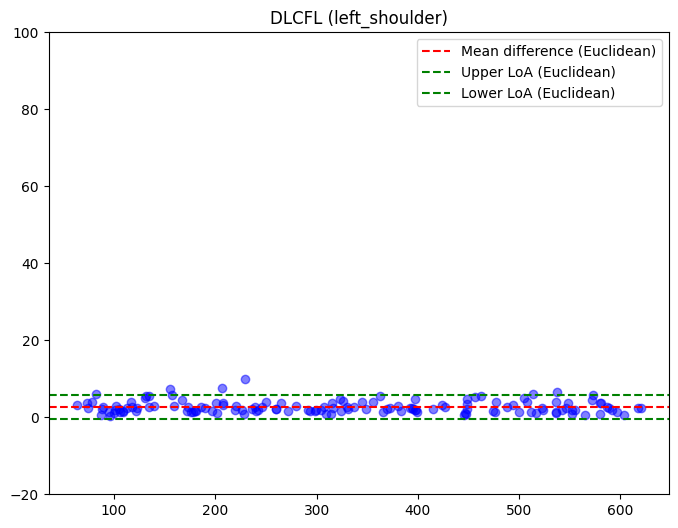

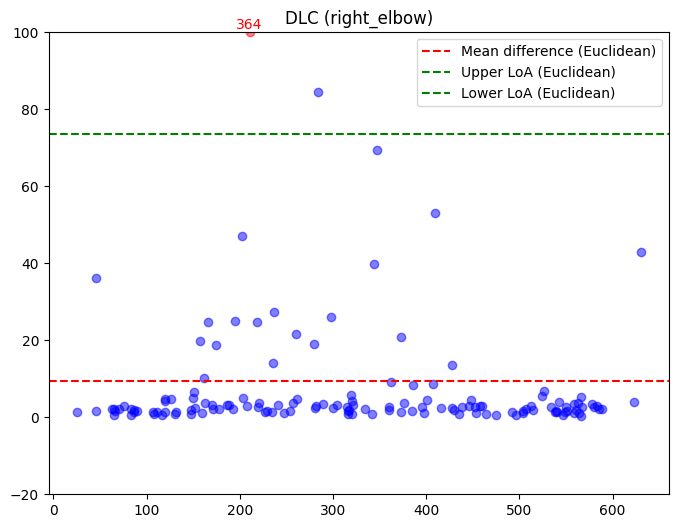

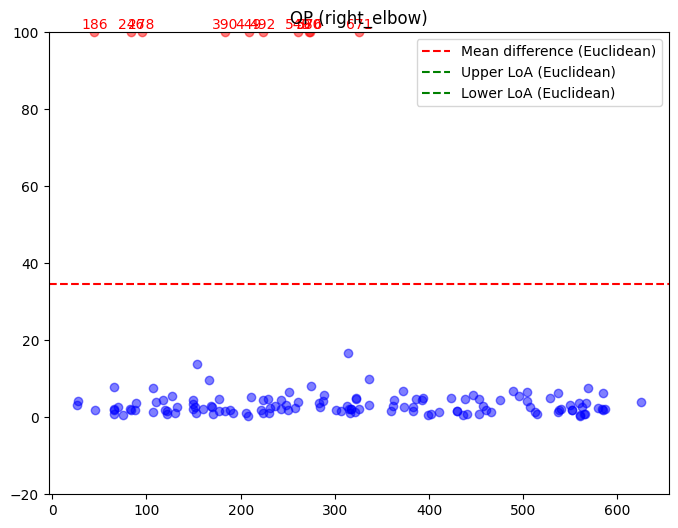

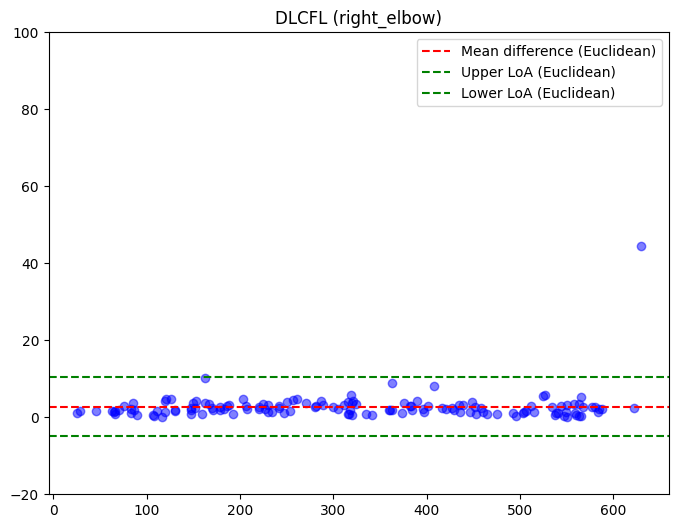

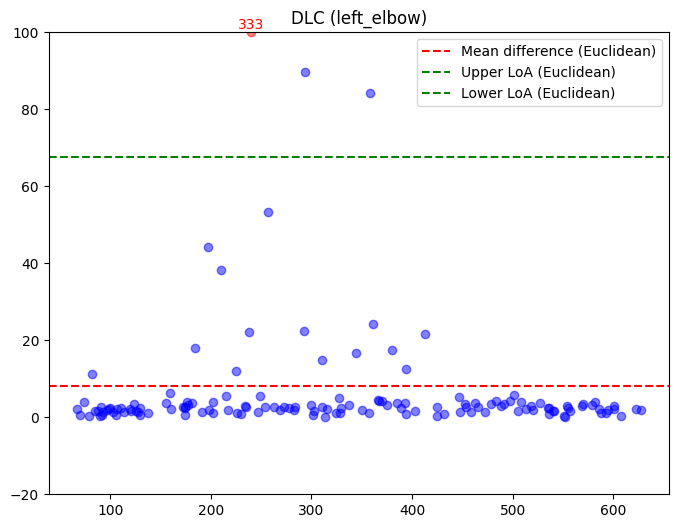

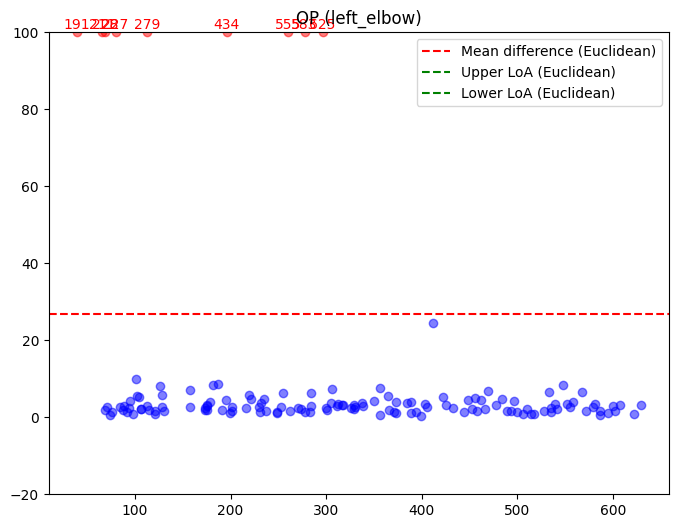

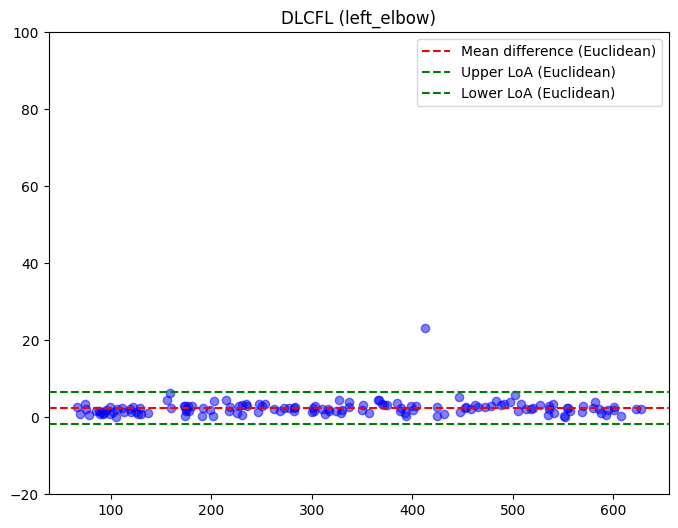

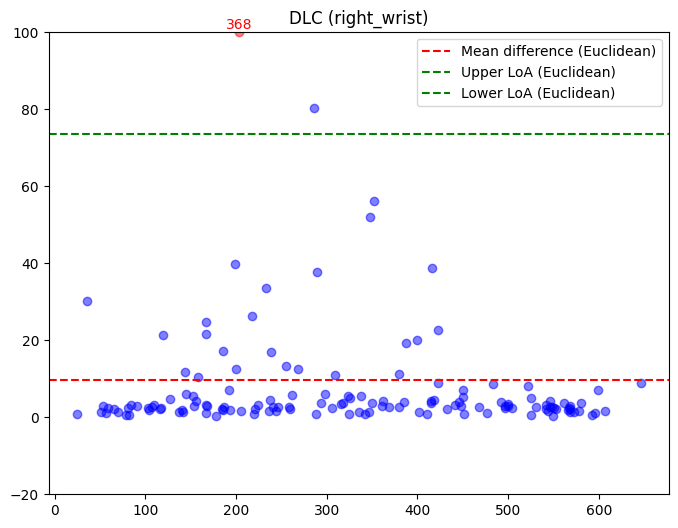

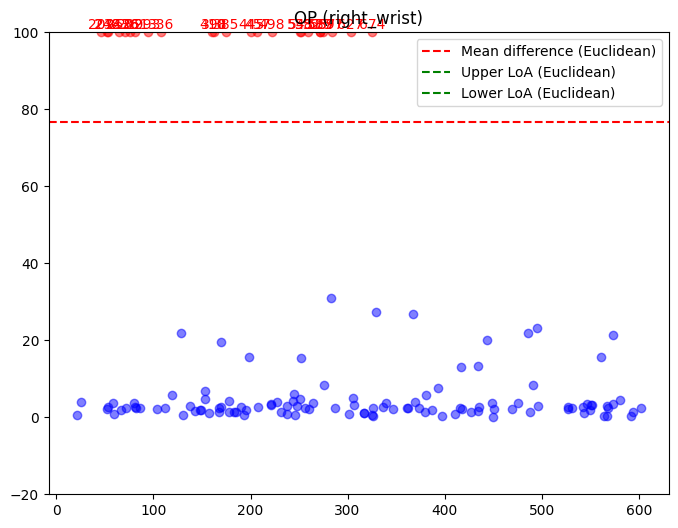

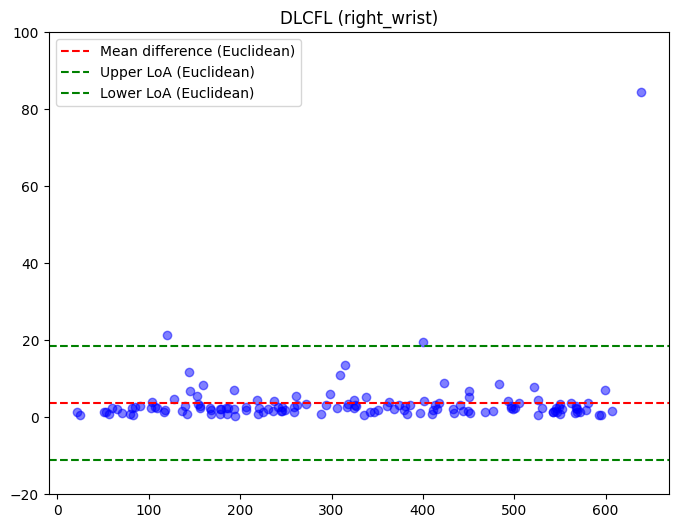

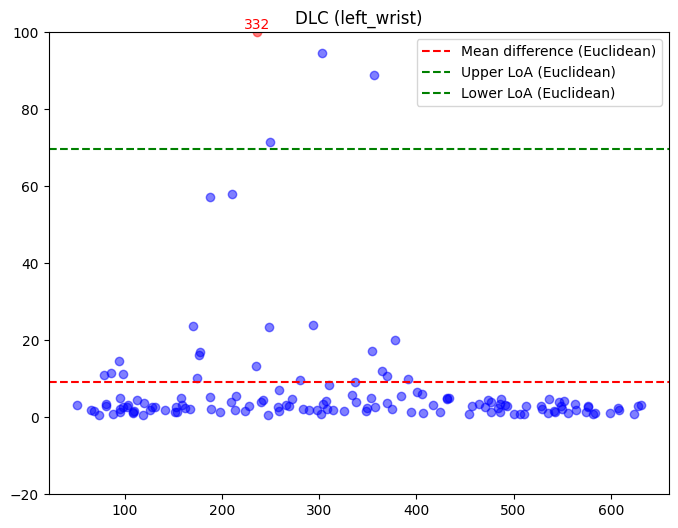

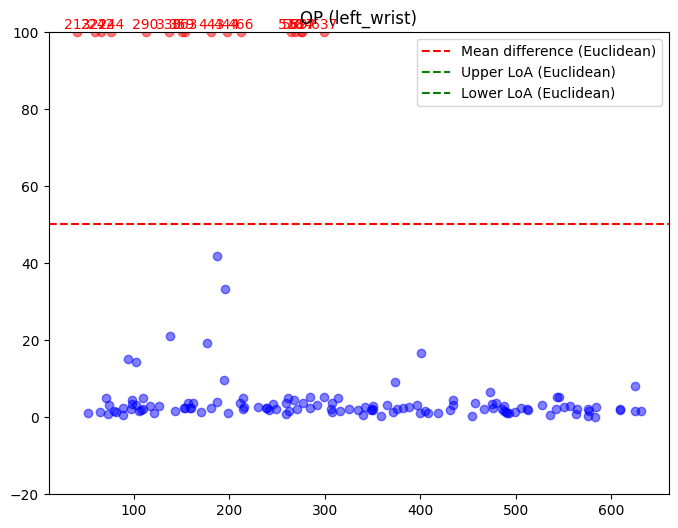

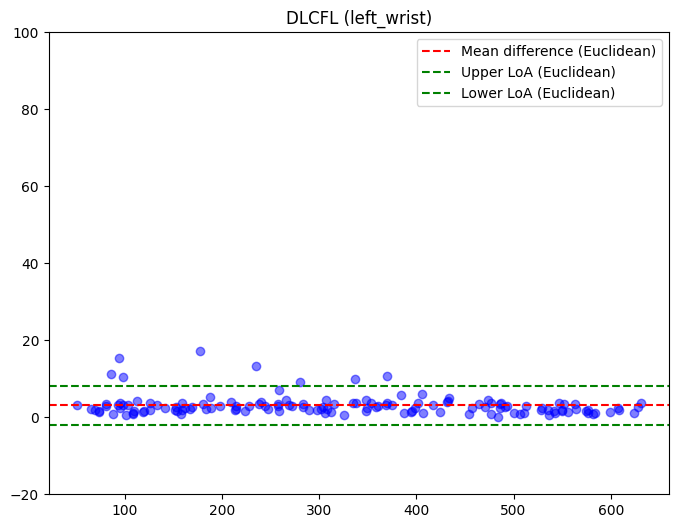

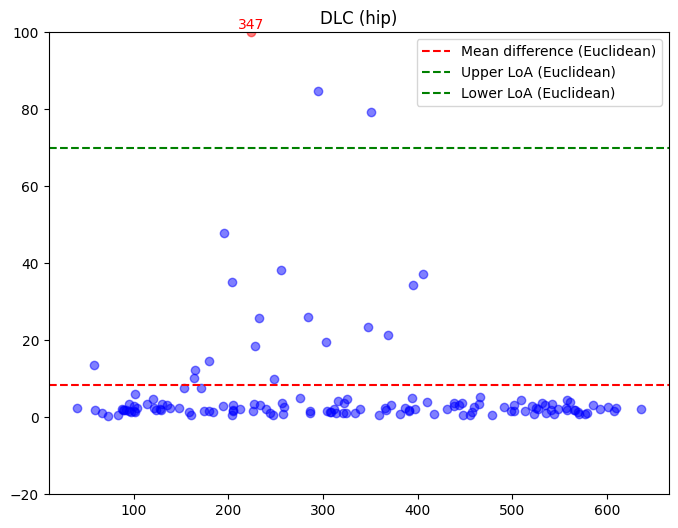

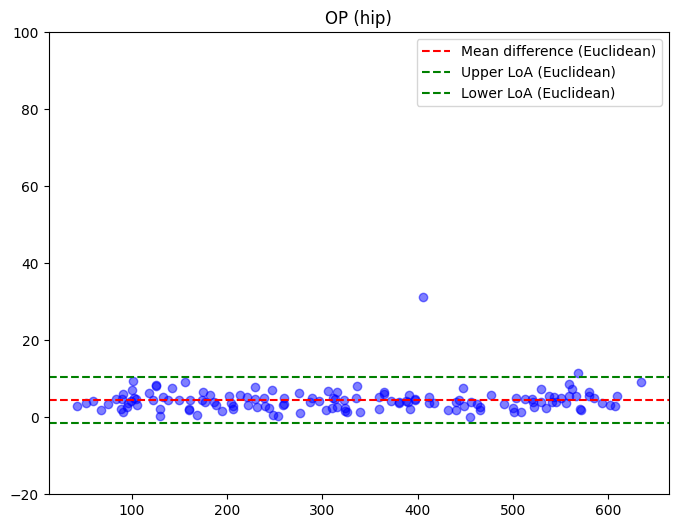

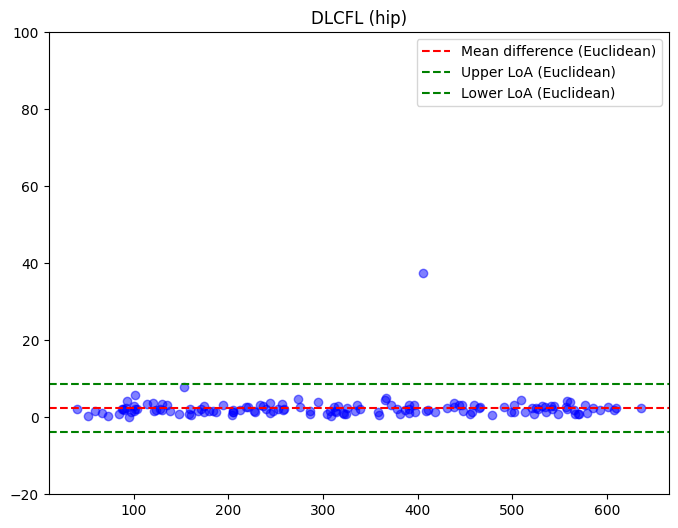

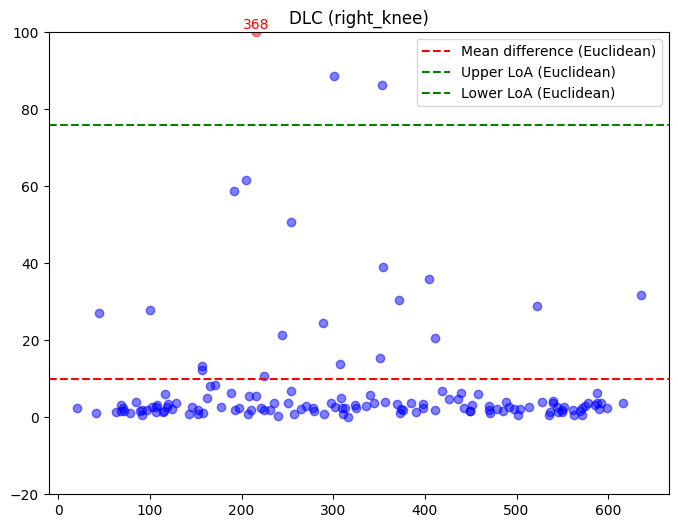

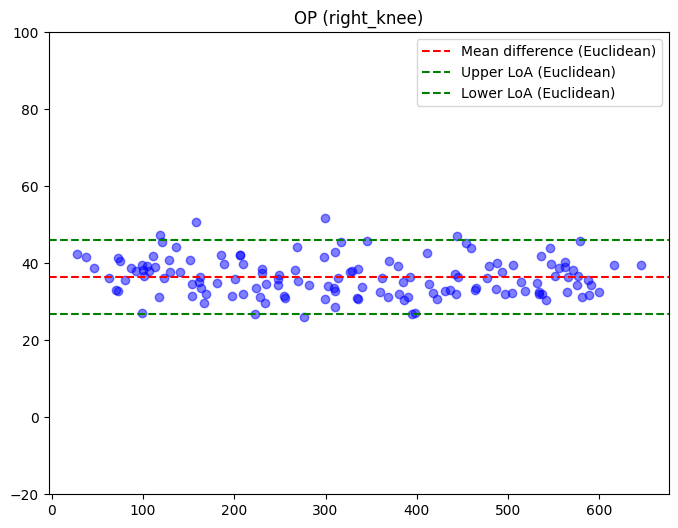

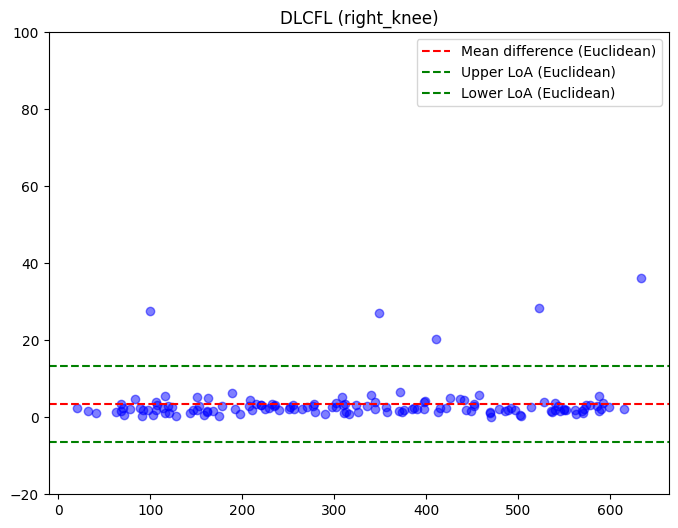

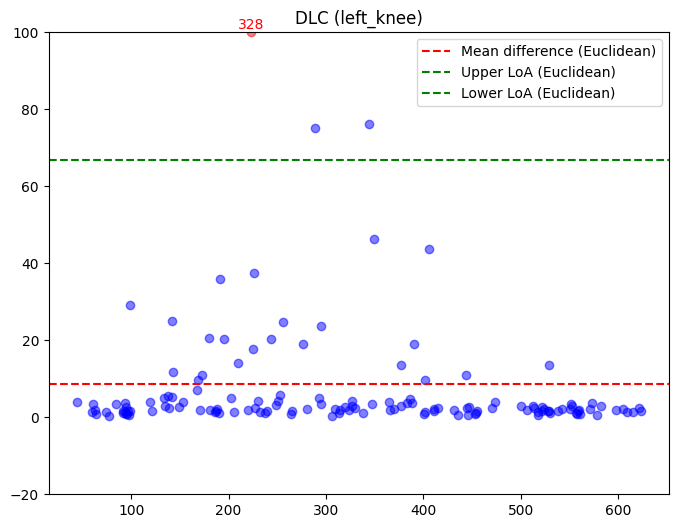

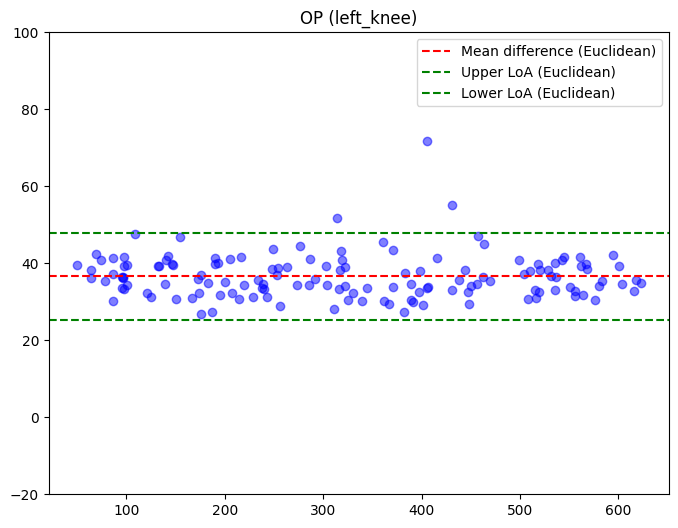

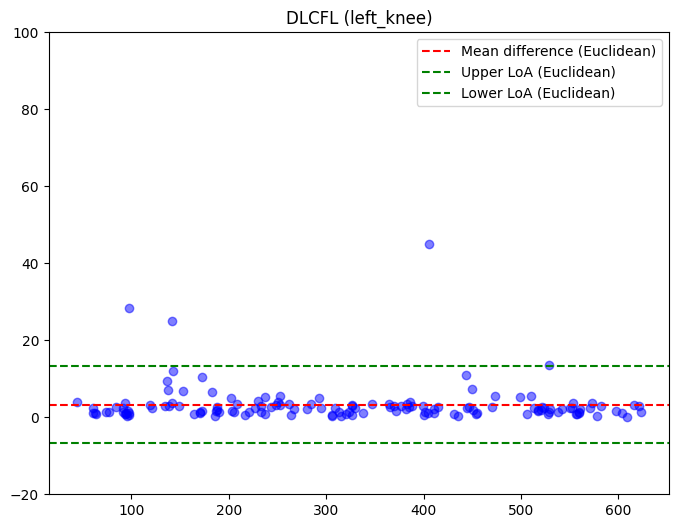

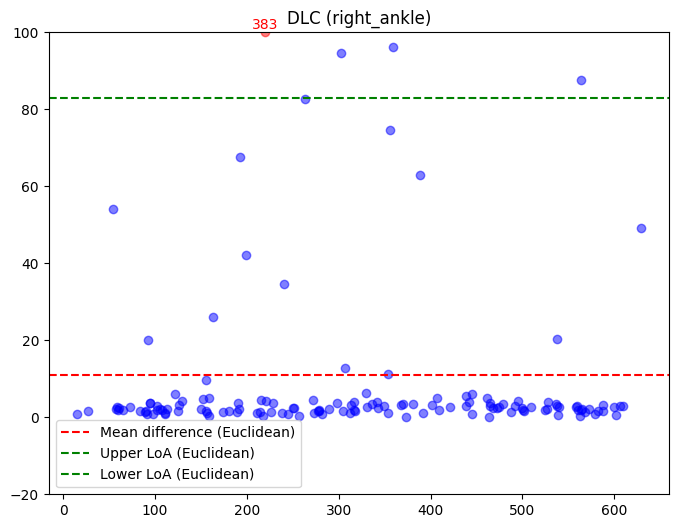

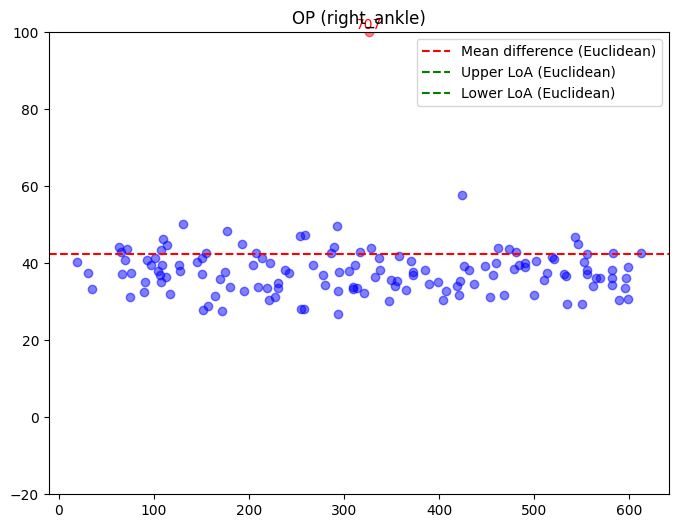

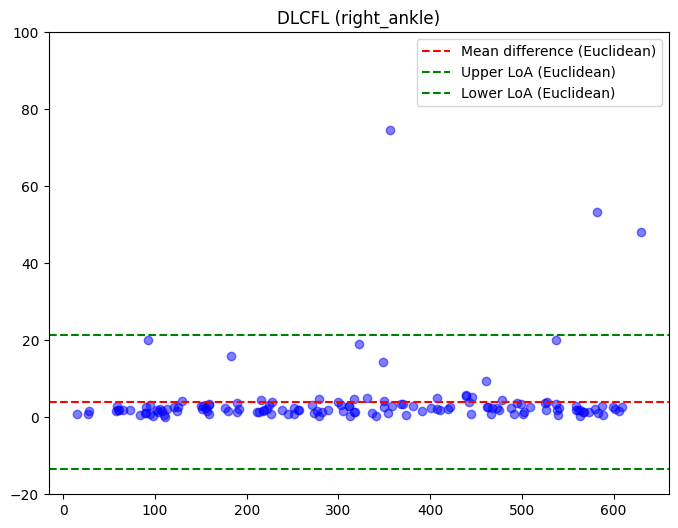

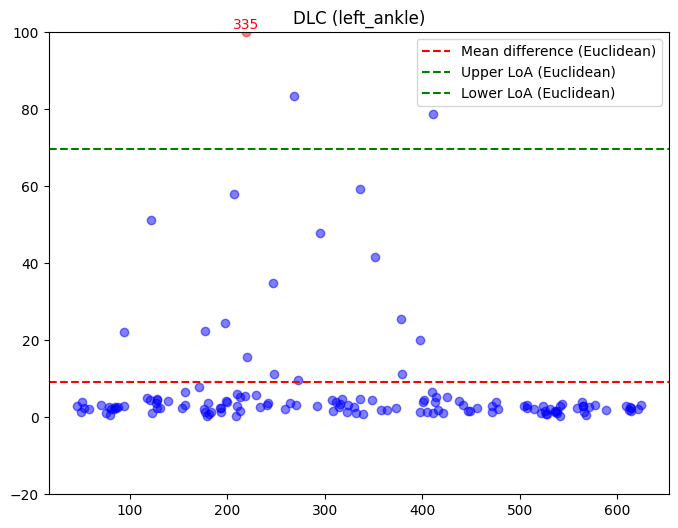

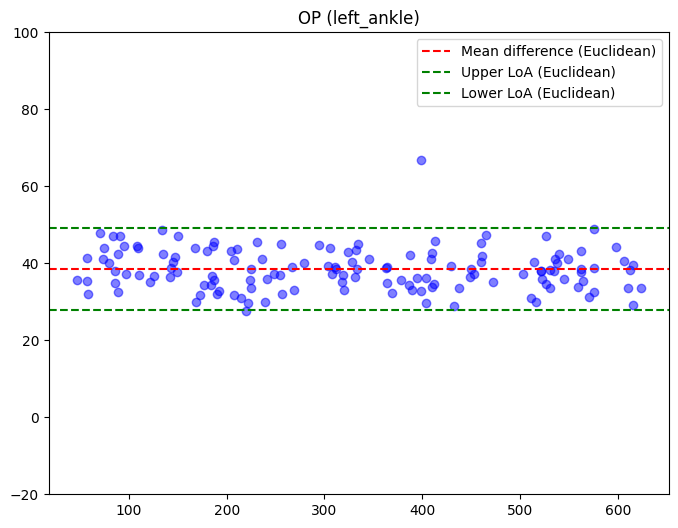

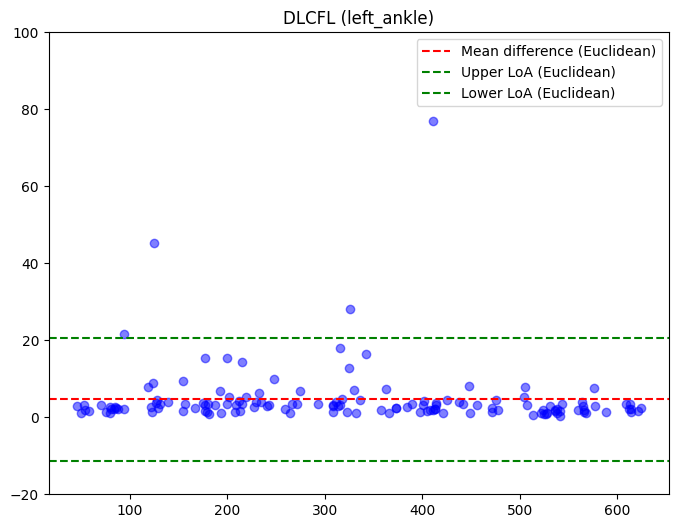

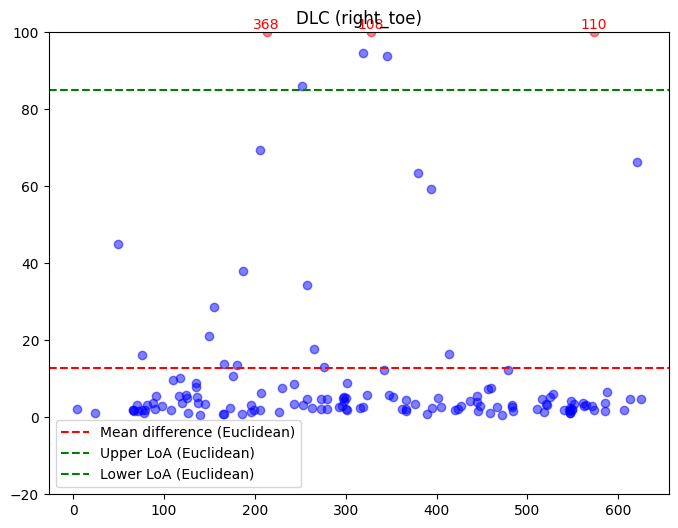

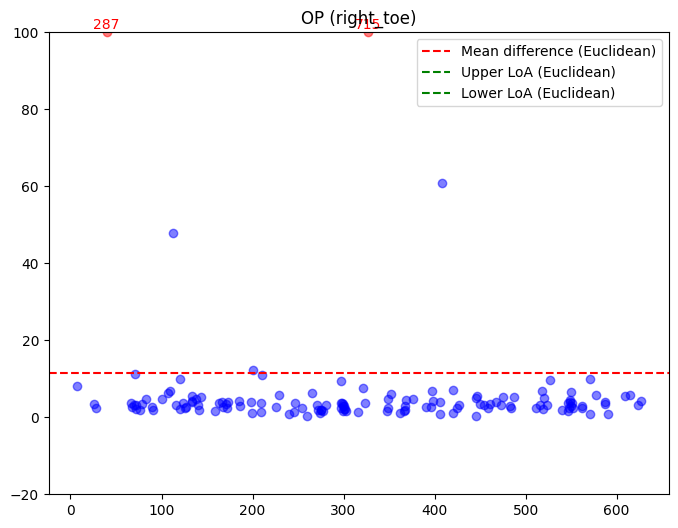

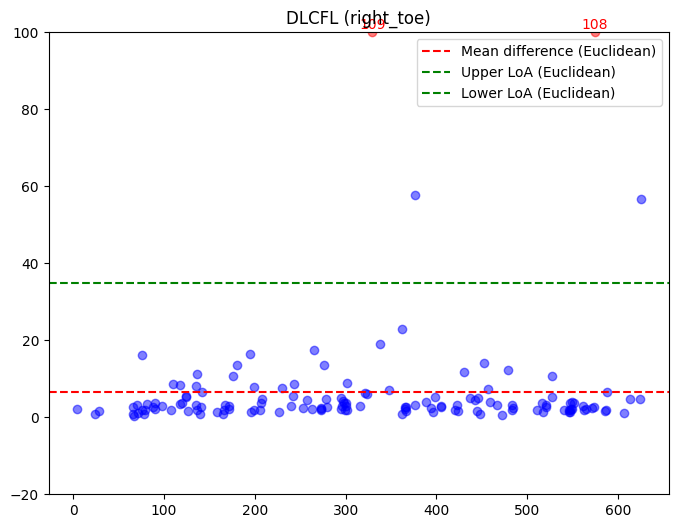

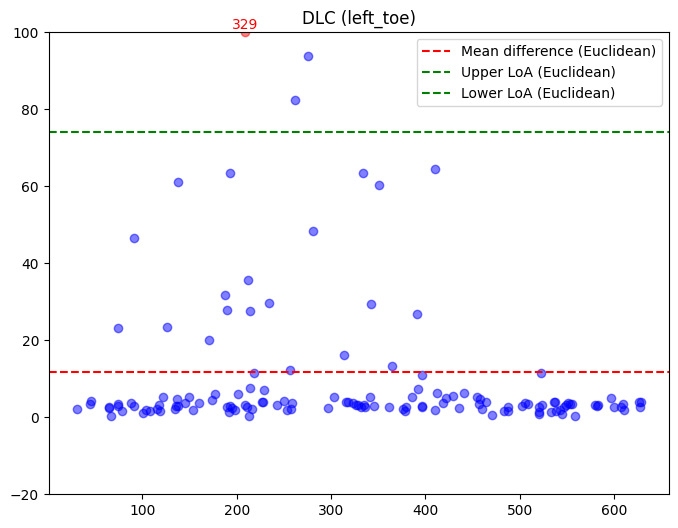

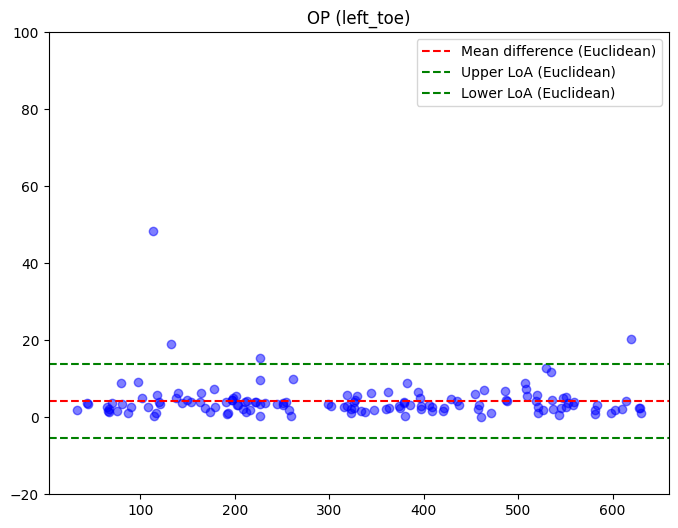

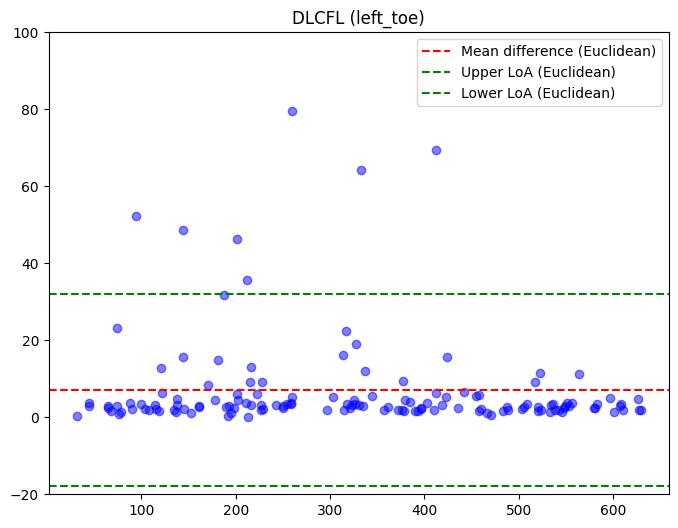

In [ ]:
#bland-altman
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 複数の被験者のデータを読み込むためのパスリスト
ground_truth_paths = ['正解データ01.csv', '正解データ02.csv', '正解データ03.csv', '正解データ04.csv', '正解データ05.csv', '正解データ06.csv', '正解データ07.csv']
dlc_data_paths = ['deeplabcut01.csv', 'deeplabcut02.csv', 'deeplabcut03.csv', 'deeplabcut04.csv', 'deeplabcut05.csv', 'deeplabcut06.csv', 'deeplabcut07.csv']
op_data_paths = ['openpose01.csv', 'openpose02.csv', 'openpose03.csv', 'openpose04.csv', 'openpose05.csv', 'openpose06.csv', 'openpose07.csv']
dlcfl_data_paths = ['deeplabcut_filter01.csv', 'deeplabcut_filter02.csv', 'deeplabcut_filter03.csv', 'deeplabcut_filter04.csv', 'deeplabcut_filter05.csv', 'deeplabcut_filter06.csv', 'deeplabcut_filter07.csv']

# 列名の設定（関節）
columns = ['head_x', 'head_y', 'right_shoulder_x', 'right_shoulder_y', 'left_shoulder_x', 'left_shoulder_y',
           'right_elbow_x', 'right_elbow_y', 'left_elbow_x', 'left_elbow_y', 'right_wrist_x', 'right_wrist_y',
           'left_wrist_x', 'left_wrist_y', 'hip_x', 'hip_y', 'right_knee_x', 'right_knee_y', 'left_knee_x',
           'left_knee_y', 'right_ankle_x', 'right_ankle_y', 'left_ankle_x', 'left_ankle_y', 'right_toe_x',
           'right_toe_y', 'left_toe_x', 'left_toe_y']

# データを統合して1つのデータフレームにする
def load_and_concatenate_data(paths, columns):
    all_data = []
    for path in paths:
        data_df = pd.read_csv(path)
        data_df.columns = columns
        all_data.append(data_df)
    return pd.concat(all_data, ignore_index=True)

# Ground truthデータの統合
ground_truth_df = load_and_concatenate_data(ground_truth_paths, columns)

# DLC, OP, DLCFLデータの統合
dlc_data_df = load_and_concatenate_data(dlc_data_paths, columns)
op_data_df = load_and_concatenate_data(op_data_paths, columns)
dlcfl_data_df = load_and_concatenate_data(dlcfl_data_paths, columns)

# 関節リストを定義
joints = ['head','right_shoulder', 'left_shoulder', 'right_elbow', 'left_elbow', 'right_wrist','left_wrist',
          'hip','right_knee', 'left_knee', 'right_ankle', 'left_ankle', 'right_toe', 'left_toe']

# Y軸の範囲を統一するための固定値
y_min, y_max = -20, 100

# 各関節に対するBland-Altmanプロットを作成する関数
def bland_altman_plot(mean_euclidean, diff_euclidean, joint_name, model_name):
    # 平均差と標準偏差を計算
    mean_diff_euclidean = diff_euclidean.mean()
    std_diff_euclidean = diff_euclidean.std()

    # 95%一致限界を計算
    loa_upper_euclidean = mean_diff_euclidean + 1.96 * std_diff_euclidean
    loa_lower_euclidean = mean_diff_euclidean - 1.96 * std_diff_euclidean

    # Bland-Altmanプロットの作成
    plt.figure(figsize=(8, 6))

    # データポイントをプロット、100以上のデータ点を100の位置に表示
    for i, diff in enumerate(diff_euclidean):
        if diff > y_max:
            plt.scatter(mean_euclidean.iloc[i], y_max, color='red', alpha=0.5)  # 赤色で表示
            plt.text(mean_euclidean.iloc[i], y_max, f'{int(diff)}', color='red', ha='center', va='bottom')
        else:
            plt.scatter(mean_euclidean.iloc[i], diff, color='blue', alpha=0.5)

    # LoAと平均差のラインを描画
    plt.axhline(mean_diff_euclidean, color='red', linestyle='--', label='Mean difference (Euclidean)')
    plt.axhline(loa_upper_euclidean, color='green', linestyle='--', label='Upper LoA (Euclidean)')
    plt.axhline(loa_lower_euclidean, color='green', linestyle='--', label='Lower LoA (Euclidean)')

    # Y軸範囲を固定
    plt.ylim([y_min, y_max])

    # ラベルとタイトル
    #plt.xlabel('Mean of Two Measurements')
    #plt.ylabel('Difference (correct data - pose estimations)')
    plt.title(f'{model_name} ({joint_name})')
    plt.legend()
    plt.show()

# DLC, OP, DLCFL 各ツールごとにBland-Altmanプロットを作成
for joint in joints:
    joint_x = f'{joint}_x'
    joint_y = f'{joint}_y'

    # DLC用のユークリッド距離の計算
    dlc_euclidean_dist = ((ground_truth_df[joint_x] - dlc_data_df[joint_x])**2 +
                          (ground_truth_df[joint_y] - dlc_data_df[joint_y])**2) ** 0.5
    dlc_mean_euclidean = (ground_truth_df[joint_x] + dlc_data_df[joint_x]) / 2
    bland_altman_plot(dlc_mean_euclidean, dlc_euclidean_dist, joint, "DLC")

    # OP用のユークリッド距離の計算
    op_euclidean_dist = ((ground_truth_df[joint_x] - op_data_df[joint_x])**2 +
                         (ground_truth_df[joint_y] - op_data_df[joint_y])**2) ** 0.5
    op_mean_euclidean = (ground_truth_df[joint_x] + op_data_df[joint_x]) / 2
    bland_altman_plot(op_mean_euclidean, op_euclidean_dist, joint, "OP")

    # DLCFL用のユークリッド距離の計算
    dlcfl_euclidean_dist = ((ground_truth_df[joint_x] - dlcfl_data_df[joint_x])**2 +
                            (ground_truth_df[joint_y] - dlcfl_data_df[joint_y])**2) ** 0.5
    dlcfl_mean_euclidean = (ground_truth_df[joint_x] + dlcfl_data_df[joint_x]) / 2
    bland_altman_plot(dlcfl_mean_euclidean, dlcfl_euclidean_dist, joint, "DLCFL")


In [ ]:
#bland-altman(色別)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 複数の被験者のデータを読み込むためのパスリスト
ground_truth_paths = ['正解データ01.csv', '正解データ02.csv', '正解データ03.csv', '正解データ04.csv', '正解データ05.csv', '正解データ06.csv', '正解データ07.csv']
dlc_data_paths = ['deeplabcut01.csv', 'deeplabcut02.csv', 'deeplabcut03.csv', 'deeplabcut04.csv', 'deeplabcut05.csv', 'deeplabcut06.csv', 'deeplabcut07.csv']
op_data_paths = ['openpose01.csv', 'openpose02.csv', 'openpose03.csv', 'openpose04.csv', 'openpose05.csv', 'openpose06.csv', 'openpose06.csv']
dlcfl_data_paths = ['deeplabcut_filter01.csv', 'deeplabcut_filter02.csv', 'deeplabcut_filter03.csv', 'deeplabcut_filter04.csv', 'deeplabcut_filter05.csv', 'deeplabcut_filter06.csv', 'deeplabcut_filter07.csv']

# 列名の設定（関節）
columns = ['head_x', 'head_y', 'right_shoulder_x', 'right_shoulder_y', 'left_shoulder_x', 'left_shoulder_y',
           'right_elbow_x', 'right_elbow_y', 'left_elbow_x', 'left_elbow_y', 'right_wrist_x', 'right_wrist_y',
           'left_wrist_x', 'left_wrist_y', 'hip_x', 'hip_y', 'right_knee_x', 'right_knee_y', 'left_knee_x',
           'left_knee_y', 'right_ankle_x', 'right_ankle_y', 'left_ankle_x', 'left_ankle_y', 'right_toe_x',
           'right_toe_y', 'left_toe_x', 'left_toe_y']

# データを統合して1つのデータフレームにする
def load_and_concatenate_data(paths, columns):
    all_data = []
    for path in paths:
        data_df = pd.read_csv(path)
        data_df.columns = columns
        all_data.append(data_df)
    return pd.concat(all_data, ignore_index=True)

# Ground truthデータの統合
ground_truth_df = load_and_concatenate_data(ground_truth_paths, columns)

# DLC, OP, DLCFLデータの統合
dlc_data_df = load_and_concatenate_data(dlc_data_paths, columns)
op_data_df = load_and_concatenate_data(op_data_paths, columns)
dlcfl_data_df = load_and_concatenate_data(dlcfl_data_paths, columns)

# 関節リストを定義
joints = ['head','right_shoulder', 'left_shoulder', 'right_elbow', 'left_elbow', 'right_wrist','left_wrist',
          'hip','right_knee', 'left_knee', 'right_ankle', 'left_ankle', 'right_toe', 'left_toe']

# Y軸の範囲を統一するための固定値
y_min, y_max = -20, 100

# 各関節に対するBland-Altmanプロットを作成する関数
def bland_altman_plot(mean_euclidean, diff_euclidean, joint_name, model_name, color):
    # 平均差と標準偏差を計算
    mean_diff_euclidean = diff_euclidean.mean()
    std_diff_euclidean = diff_euclidean.std()

    # 95%一致限界を計算
    loa_upper_euclidean = mean_diff_euclidean + 1.96 * std_diff_euclidean
    loa_lower_euclidean = mean_diff_euclidean - 1.96 * std_diff_euclidean

    # Bland-Altmanプロットの作成
    plt.figure(figsize=(8, 6))

    # データポイントをプロット、100以上のデータ点を100の位置に表示
    for i, diff in enumerate(diff_euclidean):
        if diff > y_max:
            plt.scatter(mean_euclidean.iloc[i], y_max, color=color, alpha=0.5)  # 指定色で表示
            plt.text(mean_euclidean.iloc[i], y_max, f'{int(diff)}', color=color, ha='center', va='bottom')
        else:
            plt.scatter(mean_euclidean.iloc[i], diff, color=color, alpha=0.5)

    # LoAと平均差のラインを描画し、範囲を塗りつぶし
    plt.axhline(mean_diff_euclidean, color='black', linestyle='-', label='Mean difference (Euclidean)')
    plt.axhline(loa_upper_euclidean, color='black', linestyle='--', label='Upper LoA (Euclidean)')
    plt.axhline(loa_lower_euclidean, color='black', linestyle='--', label='Lower LoA (Euclidean)')
    #plt.fill_between([x_min, x_max], loa_lower_euclidean, loa_upper_euclidean, color='grey', alpha=0.2)

    # Y軸範囲を固定
    plt.ylim([y_min, y_max])

    # ラベルとタイトル
    #plt.xlabel('Mean of Two Measurements')
    #plt.ylabel('Difference (correct data - pose estimations)')
    plt.title(f'{model_name} ({joint_name})', color=color, loc='right')
    plt.legend()
    plt.show()

# DLC, OP, DLCFL 各ツールごとにBland-Altmanプロットを作成
for joint in joints:
    joint_x = f'{joint}_x'
    joint_y = f'{joint}_y'

    # DLC用のユークリッド距離の計算
    dlc_euclidean_dist = ((ground_truth_df[joint_x] - dlc_data_df[joint_x])**2 +
                          (ground_truth_df[joint_y] - dlc_data_df[joint_y])**2) ** 0.5
    dlc_mean_euclidean = (ground_truth_df[joint_x] + dlc_data_df[joint_x]) / 2
    bland_altman_plot(dlc_mean_euclidean, dlc_euclidean_dist, joint, "DLC", "orange")

    # OP用のユークリッド距離の計算
    op_euclidean_dist = ((ground_truth_df[joint_x] - op_data_df[joint_x])**2 +
                         (ground_truth_df[joint_y] - op_data_df[joint_y])**2) ** 0.5
    op_mean_euclidean = (ground_truth_df[joint_x] + op_data_df[joint_x]) / 2
    bland_altman_plot(op_mean_euclidean, op_euclidean_dist, joint, "OP", "green")

    # DLCFL用のユークリッド距離の計算
    dlcfl_euclidean_dist = ((ground_truth_df[joint_x] - dlcfl_data_df[joint_x])**2 +
                            (ground_truth_df[joint_y] - dlcfl_data_df[joint_y])**2) ** 0.5
    dlcfl_mean_euclidean = (ground_truth_df[joint_x] + dlcfl_data_df[joint_x]) / 2
    bland_altman_plot(dlcfl_mean_euclidean, dlcfl_euclidean_dist, joint, "DLCFL", "blue")


FileNotFoundError: [Errno 2] No such file or directory: 'deeplabcut01.csv'

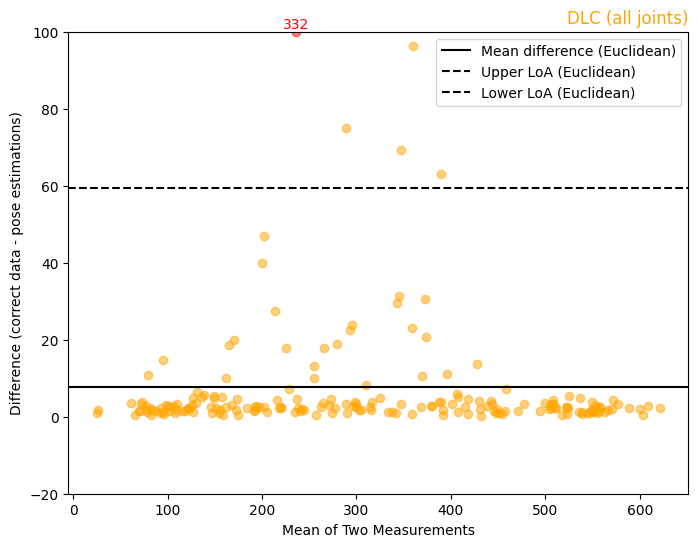

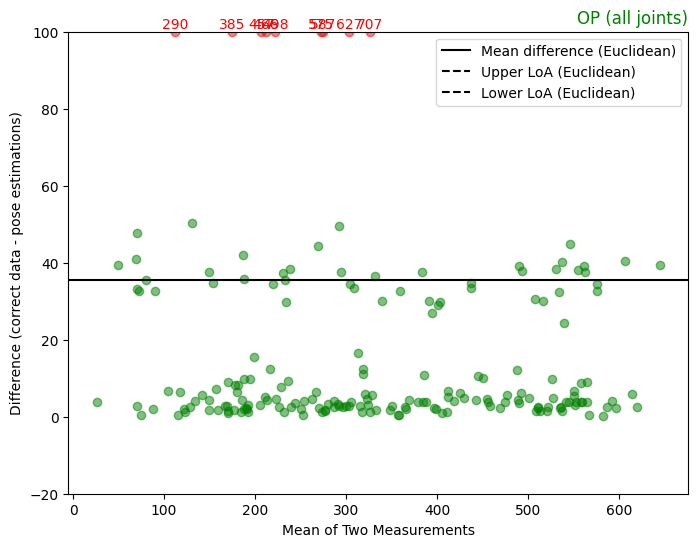

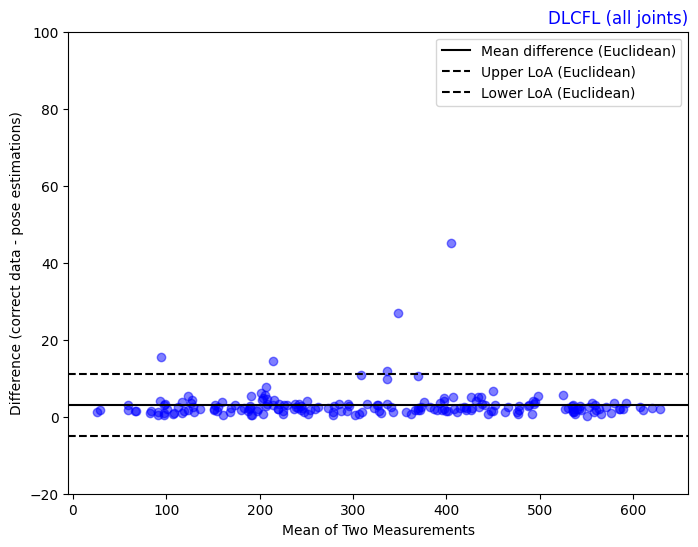

In [ ]:
#all-joints(色別)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 複数の被験者のデータを読み込むためのパスリスト
ground_truth_paths = ['正解データ01.csv', '正解データ02.csv', '正解データ03.csv', '正解データ04.csv', '正解データ05.csv', '正解データ06.csv', '正解データ07.csv']
dlc_data_paths = ['deeplabcut01.csv', 'deeplabcut02.csv', 'deeplabcut03.csv', 'deeplabcut04.csv', 'deeplabcut05.csv', 'deeplabcut06.csv', 'deeplabcut07.csv']
op_data_paths = ['openpose01.csv', 'openpose02.csv', 'openpose03.csv', 'openpose04.csv', 'openpose05.csv', 'openpose06.csv', 'openpose07.csv']
dlcfl_data_paths = ['deeplabcut_filter01.csv', 'deeplabcut_filter02.csv', 'deeplabcut_filter03.csv', 'deeplabcut_filter04.csv', 'deeplabcut_filter05.csv', 'deeplabcut_filter06.csv', 'deeplabcut_filter07.csv']

# 列名の設定（関節）
columns = ['head_x', 'head_y', 'right_shoulder_x', 'right_shoulder_y', 'left_shoulder_x', 'left_shoulder_y',
           'right_elbow_x', 'right_elbow_y', 'left_elbow_x', 'left_elbow_y', 'right_wrist_x', 'right_wrist_y',
           'left_wrist_x', 'left_wrist_y', 'hip_x', 'hip_y', 'right_knee_x', 'right_knee_y', 'left_knee_x',
           'left_knee_y', 'right_ankle_x', 'right_ankle_y', 'left_ankle_x', 'left_ankle_y', 'right_toe_x',
           'right_toe_y', 'left_toe_x', 'left_toe_y']

# データを統合して1つのデータフレームにする
def load_and_concatenate_data(paths, columns):
    all_data = []
    for path in paths:
        data_df = pd.read_csv(path)
        data_df.columns = columns
        all_data.append(data_df)
    return pd.concat(all_data, ignore_index=True)

# Ground truthデータの統合
ground_truth_df = load_and_concatenate_data(ground_truth_paths, columns)

# DLC, OP, DLCFLデータの統合
dlc_data_df = load_and_concatenate_data(dlc_data_paths, columns)
op_data_df = load_and_concatenate_data(op_data_paths, columns)
dlcfl_data_df = load_and_concatenate_data(dlcfl_data_paths, columns)

# 関節リストを定義
joints = ['head','right_shoulder', 'left_shoulder', 'right_elbow', 'left_elbow', 'right_wrist','left_wrist',
          'hip','right_knee', 'left_knee', 'right_ankle', 'left_ankle', 'right_toe', 'left_toe']

# Y軸の範囲を固定（-50〜100）
y_min, y_max = -20, 100

# 各関節に対するBland-Altmanプロットを作成する関数
def bland_altman_plot(mean_euclidean, diff_euclidean, model_name, joint_name="all joints"):
    # 平均差と標準偏差を計算
    mean_diff_euclidean = diff_euclidean.mean()
    std_diff_euclidean = diff_euclidean.std()

    # 95%一致限界を計算
    loa_upper_euclidean = mean_diff_euclidean + 1.96 * std_diff_euclidean
    loa_lower_euclidean = mean_diff_euclidean - 1.96 * std_diff_euclidean

    # カラーマッピング
    color_map = {"DLC": "orange", "OP": "green", "DLCFL": "blue"}
    color = color_map.get(model_name, "blue")

    # Bland-Altmanプロットの作成
    plt.figure(figsize=(8, 6))

    # データポイントをプロット、100以上のデータ点を100の位置に表示
    for i, diff in enumerate(diff_euclidean):
        if diff > y_max:
            plt.scatter(mean_euclidean.iloc[i], y_max, color='red', alpha=0.5)  # 赤色で表示
            plt.text(mean_euclidean.iloc[i], y_max, f'{int(diff)}', color='red', ha='center', va='bottom')
        else:
            plt.scatter(mean_euclidean.iloc[i], diff, color=color, alpha=0.5)

    # LoAと平均差のラインを描画
    plt.axhline(mean_diff_euclidean, color='black', linestyle='-', label='Mean difference (Euclidean)')
    plt.axhline(loa_upper_euclidean, color='black', linestyle='--', label='Upper LoA (Euclidean)')
    plt.axhline(loa_lower_euclidean, color='black', linestyle='--', label='Lower LoA (Euclidean)')

    # Y軸範囲を固定
    plt.ylim([y_min, y_max])

    # ラベルとタイトル
    plt.xlabel('Mean of Two Measurements')
    plt.ylabel('Difference (correct data - pose estimations)')
    plt.title(f'{model_name} ({joint_name})', loc='right', color=color)
    plt.legend()
    plt.show()

# 全関節のデータをまとめる
def combined_bland_altman(ground_truth_df, data_df, model_name, sample_fraction=0.1):
    all_mean_euclidean = []
    all_diff_euclidean = []

    for joint in joints:
        joint_x = f'{joint}_x'
        joint_y = f'{joint}_y'

        # ユークリッド距離の計算
        euclidean_dist = ((ground_truth_df[joint_x] - data_df[joint_x])**2 +
                          (ground_truth_df[joint_y] - data_df[joint_y])**2) ** 0.5
        mean_euclidean = (ground_truth_df[joint_x] + data_df[joint_x]) / 2

        # リストに追加
        all_mean_euclidean.extend(mean_euclidean)
        all_diff_euclidean.extend(euclidean_dist)

    # リストをシリーズに変換
    all_mean_euclidean = pd.Series(all_mean_euclidean)
    all_diff_euclidean = pd.Series(all_diff_euclidean)

    # ランダムにデータをサンプリング
    sampled_indices = np.random.choice(all_mean_euclidean.index, int(len(all_mean_euclidean) * sample_fraction), replace=False)
    sampled_mean_euclidean = all_mean_euclidean.iloc[sampled_indices]
    sampled_diff_euclidean = all_diff_euclidean.iloc[sampled_indices]

    # Bland-Altmanプロットの作成
    bland_altman_plot(sampled_mean_euclidean, sampled_diff_euclidean, model_name)

# 各モデルについて全関節をまとめたBland-Altmanプロットを作成
combined_bland_altman(ground_truth_df, dlc_data_df, "DLC")
combined_bland_altman(ground_truth_df, op_data_df, "OP")
combined_bland_altman(ground_truth_df, dlcfl_data_df, "DLCFL")


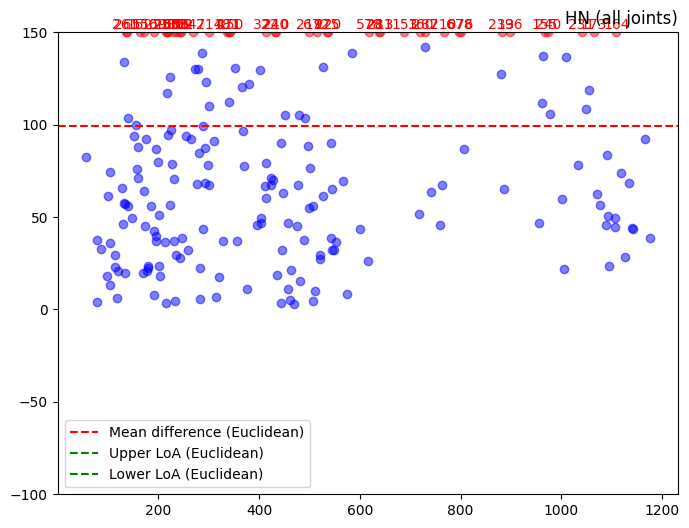

In [ ]:
#All-joints
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 複数の被験者のデータを読み込むためのパスリスト
ground_truth_paths = ['正解データ01.csv', '正解データ02.csv', '正解データ03.csv', '正解データ04.csv', '正解データ05.csv', '正解データ06.csv', '正解データ07.csv','正解データ08.csv','正解データ09.csv','正解データ10.csv','正解データ11.csv','正解データ12.csv','正解データ13.csv','正解データ14.csv','正解データ15.csv']
#dlc_data_paths = ['deeplabcut01.csv', 'deeplabcut02.csv', 'deeplabcut03.csv', 'deeplabcut04.csv', 'deeplabcut05.csv', 'deeplabcut06.csv', 'deeplabcut07.csv', 'deeplabcut08.csv', 'deeplabcut09.csv', 'deeplabcut10.csv', 'deeplabcut11.csv', 'deeplabcut12.csv', 'deeplabcut13.csv', 'deeplabcut14.csv', 'deeplabcut15.csv']
#op_data_paths = ['openpose01.csv', 'openpose02.csv', 'openpose03.csv', 'openpose04.csv', 'openpose05.csv', 'openpose06.csv', 'openpose07.csv', 'openpose08.csv', 'openpose09.csv', 'openpose10.csv', 'openpose11.csv', 'openpose12.csv', 'openpose13.csv', 'openpose14.csv', 'openpose15.csv']
#dlcfl_data_paths = ['deeplabcut_filter01.csv', 'deeplabcut_filter02.csv', 'deeplabcut_filter03.csv', 'deeplabcut_filter04.csv', 'deeplabcut_filter05.csv', 'deeplabcut_filter06.csv', 'deeplabcut_filter07.csv', 'deeplabcut_filter08.csv', 'deeplabcut_filter09.csv', 'deeplabcut_filter10.csv', 'deeplabcut_filter11.csv', 'deeplabcut_filter12.csv', 'deeplabcut_filter13.csv', 'deeplabcut_filter14.csv', 'deeplabcut_filter15.csv']
#mp_data_paths = ['mediapipe01.csv','mediapipe02.csv','mediapipe03.csv','mediapipe04.csv','mediapipe05.csv','mediapipe06.csv','mediapipe07.csv','mediapipe08.csv','mediapipe09.csv','mediapipe10.csv','mediapipe11.csv','mediapipe12.csv','mediapipe13.csv','mediapipe14.csv','mediapipe15.csv']
#d2_data_paths =['detection2 01.csv','detection2 02.csv','detection2 03.csv','detection2 04.csv','detection2 05.csv','detection2 06.csv','detection2 07.csv','detection2 08.csv','detection2 09.csv','detection2 10.csv','detection2 11.csv','detection2 12.csv','detection2 13.csv','detection2 14.csv','detection2 15.csv']
hn_data_paths =['hrnet01.csv','hrnet02.csv','hrnet03.csv','hrnet04.csv','hrnet05.csv','hrnet06.csv','hrnet07.csv','hrnet08.csv','hrnet09.csv','hrnet10.csv','hrnet11.csv','hrnet12.csv','hrnet13.csv','hrnet14.csv','hrnet15.csv',]
# 列名の設定（関節)
columns = ['head_x', 'head_y', 'right_shoulder_x', 'right_shoulder_y', 'left_shoulder_x', 'left_shoulder_y',
           'right_elbow_x', 'right_elbow_y', 'left_elbow_x', 'left_elbow_y', 'right_wrist_x', 'right_wrist_y',
           'left_wrist_x', 'left_wrist_y', 'hip_x', 'hip_y', 'right_knee_x', 'right_knee_y', 'left_knee_x',
           'left_knee_y', 'right_ankle_x', 'right_ankle_y', 'left_ankle_x', 'left_ankle_y', 'right_toe_x',
           'right_toe_y', 'left_toe_x', 'left_toe_y']

# データを統合して1つのデータフレームにする
def load_and_concatenate_data(paths, columns):
    all_data = []
    for path in paths:
        data_df = pd.read_csv(path)
        data_df.columns = columns
        all_data.append(data_df)
    return pd.concat(all_data, ignore_index=True)

# Ground truthデータの統合
ground_truth_df = load_and_concatenate_data(ground_truth_paths, columns)

# DLC, OP, DLCFLデータの統合
#op_data_df = load_and_concatenate_data(op_data_paths, columns)
hn_data_df = load_and_concatenate_data(hn_data_paths, columns)
#d2_data_df = load_and_concatenate_data(d2_data_paths, columns)
#mp_data_df = load_and_concatenate_data(mp_data_paths, columns)
#dlc_data_df = load_and_concatenate_data(dlc_data_paths, columns)
#dlcfl_data_df = load_and_concatenate_data(dlcfl_data_paths, columns)

# 関節リストを定義
joints = ['head','right_shoulder', 'left_shoulder', 'right_elbow', 'left_elbow', 'right_wrist','left_wrist',
          'hip','right_knee', 'left_knee', 'right_ankle', 'left_ankle', 'right_toe', 'left_toe']

# Y軸の範囲を固定（-50〜100）
y_min, y_max = -100, 150

# 各関節に対するBland-Altmanプロットを作成する関数
def bland_altman_plot(mean_euclidean, diff_euclidean, model_name, joint_name="all joints"):
    # 平均差と標準偏差を計算
    mean_diff_euclidean = diff_euclidean.mean()
    std_diff_euclidean = diff_euclidean.std()

    # 95%一致限界を計算
    loa_upper_euclidean = mean_diff_euclidean + 1.96 * std_diff_euclidean
    loa_lower_euclidean = mean_diff_euclidean - 1.96 * std_diff_euclidean

    # Bland-Altmanプロットの作成
    plt.figure(figsize=(8, 6))

    # データポイントをプロット、100以上のデータ点を100の位置に表示
    for i, diff in enumerate(diff_euclidean):
        if diff > y_max:
            plt.scatter(mean_euclidean.iloc[i], y_max, color='red', alpha=0.5)  # 赤色で表示
            plt.text(mean_euclidean.iloc[i], y_max, f'{int(diff)}', color='red', ha='center', va='bottom')
        else:
            plt.scatter(mean_euclidean.iloc[i], diff, color='blue', alpha=0.5)

    # LoAと平均差のラインを描画
    plt.axhline(mean_diff_euclidean, color='red', linestyle='--', label='Mean difference (Euclidean)')
    plt.axhline(loa_upper_euclidean, color='green', linestyle='--', label='Upper LoA (Euclidean)')
    plt.axhline(loa_lower_euclidean, color='green', linestyle='--', label='Lower LoA (Euclidean)')

    # Y軸範囲を固定
    plt.ylim([y_min, y_max])

    # ラベルとタイトル
    #plt.xlabel('Mean of Two Measurements')
    #plt.ylabel('Difference (correct data - pose estimations)')
    plt.title(f'{model_name} ({joint_name})', loc='right')
    plt.legend()
    plt.show()

# 全関節のデータをまとめる
def combined_bland_altman(ground_truth_df, data_df, model_name, sample_fraction=0.1):
    all_mean_euclidean = []
    all_diff_euclidean = []

    for joint in joints:
        joint_x = f'{joint}_x'
        joint_y = f'{joint}_y'

        # ユークリッド距離の計算
        euclidean_dist = ((ground_truth_df[joint_x] - data_df[joint_x])**2 +
                          (ground_truth_df[joint_y] - data_df[joint_y])**2) ** 0.5
        mean_euclidean = (ground_truth_df[joint_x] + data_df[joint_x]) / 2

        # リストに追加
        all_mean_euclidean.extend(mean_euclidean)
        all_diff_euclidean.extend(euclidean_dist)

    # リストをシリーズに変換
    all_mean_euclidean = pd.Series(all_mean_euclidean)
    all_diff_euclidean = pd.Series(all_diff_euclidean)

    # ランダムにデータをサンプリング
    sampled_indices = np.random.choice(all_mean_euclidean.index, int(len(all_mean_euclidean) * sample_fraction), replace=False)
    sampled_mean_euclidean = all_mean_euclidean.iloc[sampled_indices]
    sampled_diff_euclidean = all_diff_euclidean.iloc[sampled_indices]

    # Bland-Altmanプロットの作成
    bland_altman_plot(sampled_mean_euclidean, sampled_diff_euclidean, model_name)

# 各モデルについて全関節をまとめたBland-Altmanプロットを作成
#combined_bland_altman(ground_truth_df, op_data_df, "OP", sample_fraction=0.05)  # データ量の5%を使用
combined_bland_altman(ground_truth_df, hn_data_df, "HN", sample_fraction=0.05)
#combined_bland_altman(ground_truth_df, d2_data_df, "D2", sample_fraction=0.05)
#combined_bland_altman(ground_truth_df, mp_data_df, "MP", sample_fraction=0.05)
#combined_bland_altman(ground_truth_df, dlc_data_df, "DLC", sample_fraction=0.05)
#combined_bland_altman(ground_truth_df, dlcfl_data_df, "DLCFL", sample_fraction=0.05)


# 欠損率

In [ ]:
import pandas as pd
import os

# ファイル名のパターン（openpose01.csv から openpose15.csv）
file_pattern = '/content/detection2 {:02d}.csv'

# 保存先の出力ファイル
output_file = '/content/detectron2.csv'

# 結果を格納するリスト
all_results = []

# ファイルをループ処理
for i in range(1, 16):  # 1から15まで
    file_path = file_pattern.format(i)
    if not os.path.exists(file_path):
        print(f"ファイルが見つかりません: {file_path}")
        continue

    # CSVファイルを読み込む
    data = pd.read_csv(file_path)

    # 欠損率の計算（値が0の割合）
    missing_rates = (data == 0).sum(axis=1) / data.shape[1]

    # フレーム番号とファイル名を含むデータフレームを作成
    result = pd.DataFrame({
        'frame': range(1, len(missing_rates) + 1),  # フレーム番号
        'missing_rate': missing_rates,  # 欠損率
        'file': f'detection2{i:02d}.csv'  # ファイル名
    })

    # 結果をリストに追加
    all_results.append(result)

# 全ての結果を結合
summary = pd.concat(all_results, ignore_index=True)

# 平均欠損率を計算
average_missing_rate = summary['missing_rate'].mean()
print(f"全ファイルの平均欠損率: {average_missing_rate:.2%}")

# 結果をCSVに保存
summary.to_csv(output_file, index=False)
print(f"全ての欠損率データを {output_file} に保存しました。")

全ファイルの平均欠損率: 0.00%
全ての欠損率データを /content/detectron2.csv に保存しました。


# 被験者間のばらつき

In [ ]:
import pandas as pd
import os

# フォルダ内の全ファイルを処理
file_names = ["D2.csv", "DLC.csv", "DLC_FL.csv", "HN.csv", "MP.csv", "OP.csv"]  # 解析対象ファイル名
results = []  # 結果を格納するリスト

# 各ファイルを読み込んで解析
for file in file_names:
    # CSVを読み込む
    data = pd.read_csv(file)

    # 各関節ごとの平均、標準偏差、変動係数を計算
    mean_mae = data.mean(axis=1)  # 平均
    std_mae = data.std(axis=1)  # 標準偏差
    cv_mae = (std_mae / mean_mae) * 100  # 変動係数(%)

    # 結果をデータフレームに格納
    variability = pd.DataFrame({
        "Joint": data.index,
        "Mean (MAE)": mean_mae,
        "Standard Deviation": std_mae,
        "Coefficient of Variation (%)": cv_mae
    })

    # ツール名を追加
    tool_name = os.path.splitext(file)[0]  # ファイル名から拡張子を除去
    variability["Tool"] = tool_name

    # 結果をリストに追加
    results.append(variability)

# 全ツールの結果を結合
all_results = pd.concat(results, ignore_index=True)

# 結果を表示
print(all_results)

# 必要に応じてCSVとして保存
all_results.to_csv("All_Tools_Variability_Analysis.csv", index=False)

    Joint  Mean (MAE)  Standard Deviation  Coefficient of Variation (%) Tool
0       0    7.369108            6.311914                     85.653699   D2
1       1    6.298078            5.124731                     81.369769   D2
2       2    7.041753            5.310497                     75.414426   D2
3       3    6.221399            6.626966                    106.518893   D2
4       4    6.354399            5.824915                     91.667439   D2
..    ...         ...                 ...                           ...  ...
85     10   29.150700           31.227023                    107.122719   OP
86     11   31.901348           35.738077                    112.026857   OP
87     12   27.808856           29.511270                    106.121841   OP
88     13   13.666676           15.479612                    113.265371   OP
89     14   15.473355           18.012925                    116.412541   OP

[90 rows x 5 columns]


# 誤差の大きさの基準


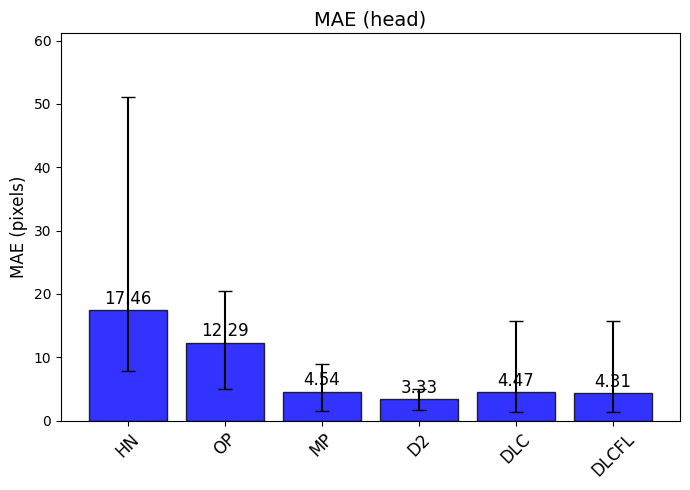

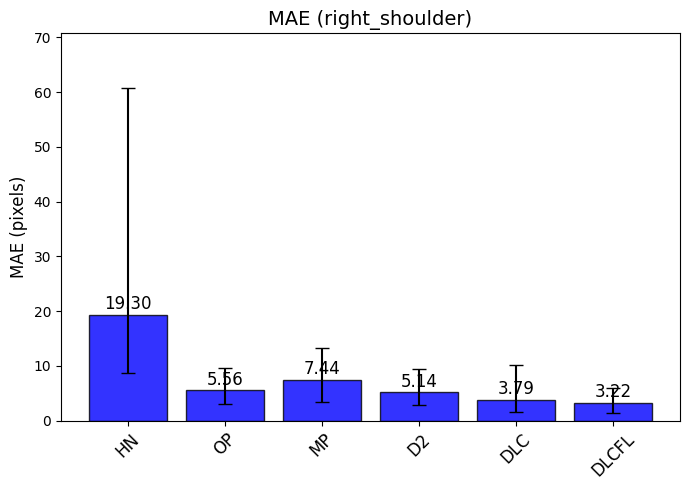

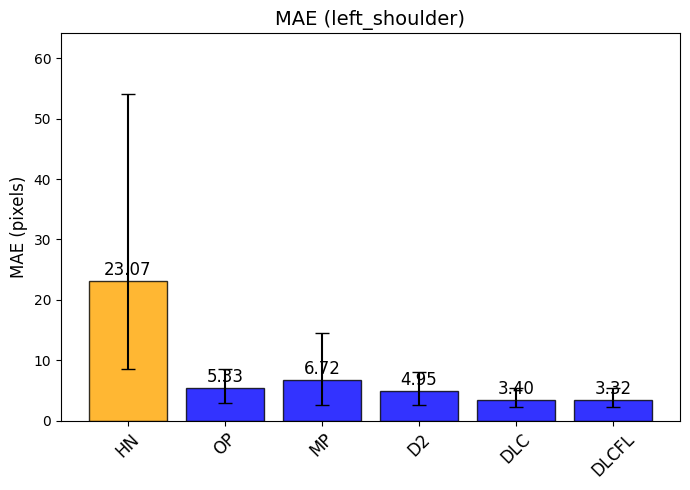

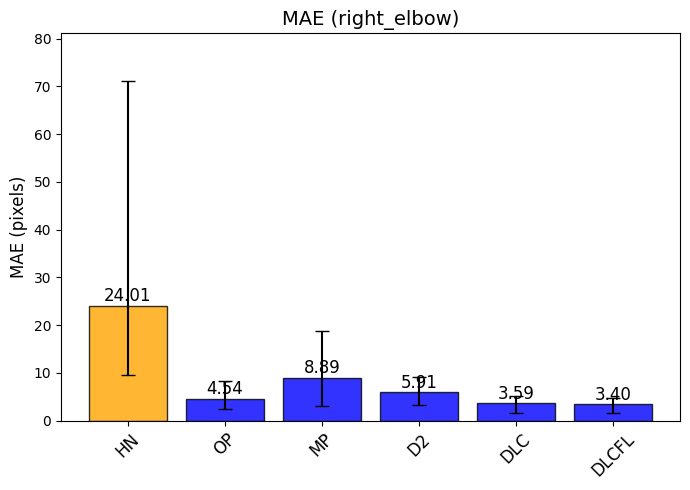

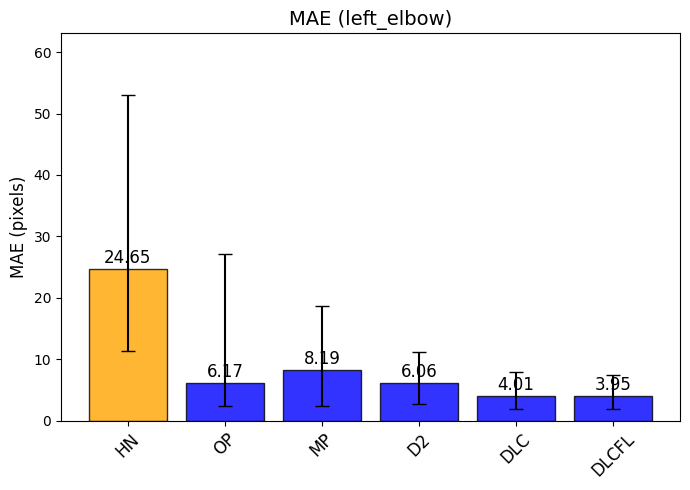

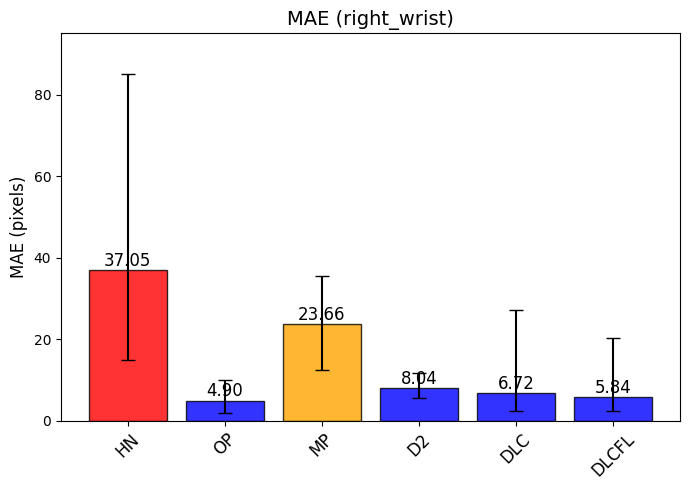

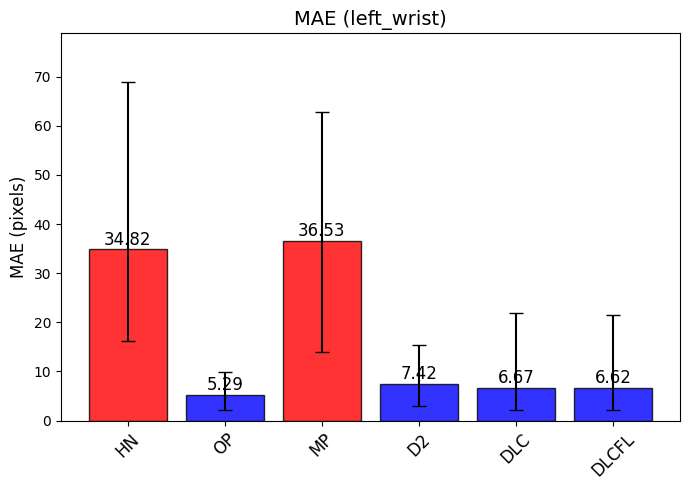

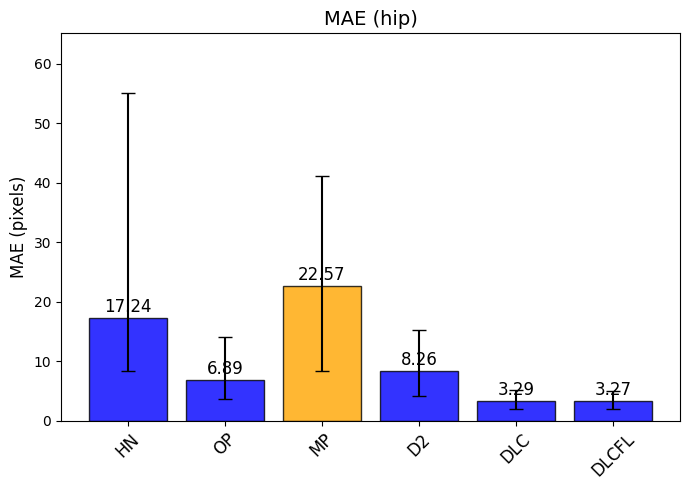

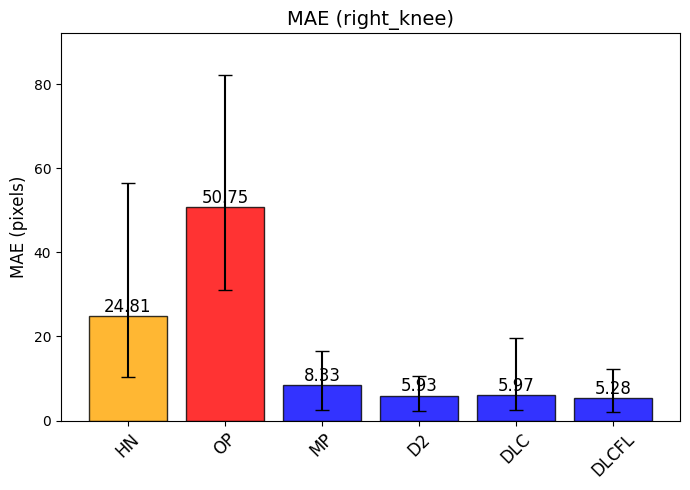

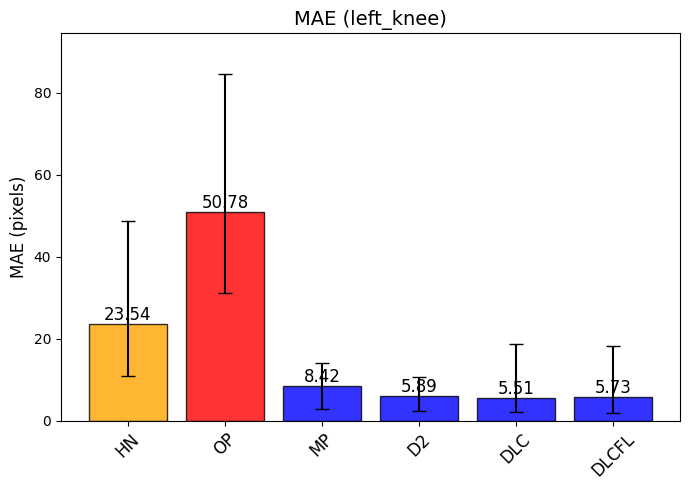

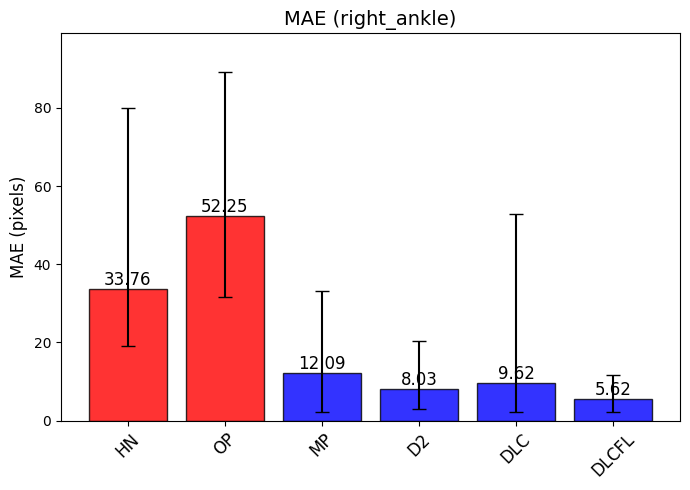

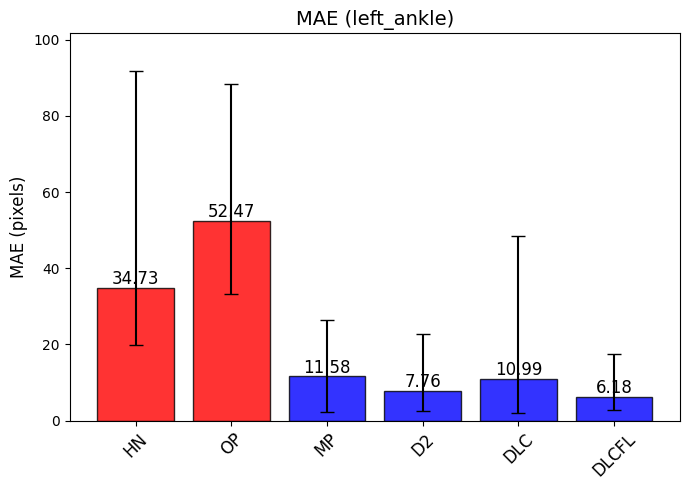

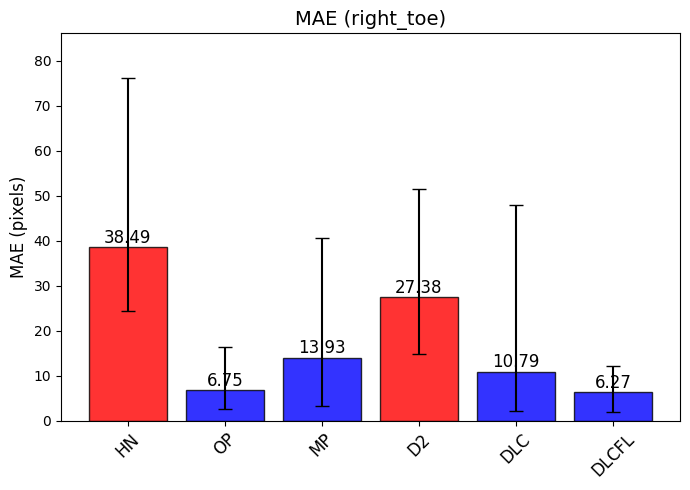

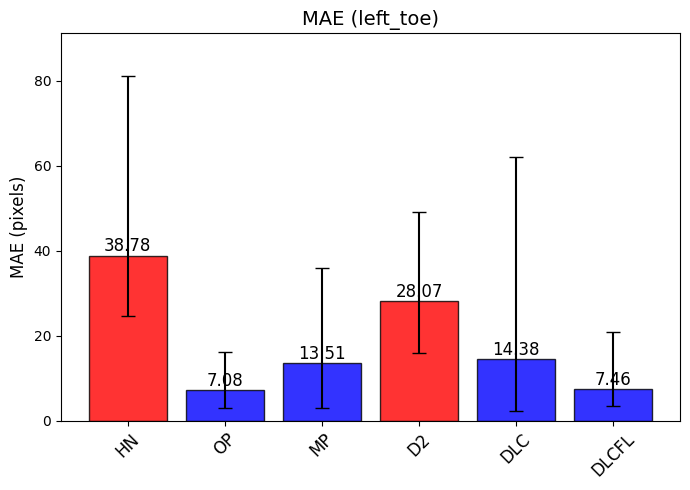

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
op_data = pd.read_csv('/content/OP.csv')
dlc_data = pd.read_csv('/content/DLC.csv')
dlc_fl_data = pd.read_csv('/content/DLC_FL.csv')
mp_data = pd.read_csv('/content/MP.csv')
d2_data = pd.read_csv('/content/D2.csv')
hn_data = pd.read_csv('/content/HN.csv')

# Extract the column names (joint names)
joints = op_data.columns

# Define models in specified order
models = ['HN', 'OP', 'MP', 'D2', 'DLC', 'DLCFL']

# Calculate global IQR-based thresholds across all joints and models
all_values = np.concatenate([hn_data.values.flatten(), op_data.values.flatten(),
                             mp_data.values.flatten(), d2_data.values.flatten(),
                             dlc_data.values.flatten(), dlc_fl_data.values.flatten()])

Q1_global = np.percentile(all_values, 25)
Q3_global = np.percentile(all_values, 75)
IQR_global = Q3_global - Q1_global

# Thresholds for highlighting abnormal values
orange_threshold = Q3_global + 0.25 * IQR_global
red_threshold = Q3_global + 0.75 * IQR_global

# Initialize MAE statistics for each model
mae_stats = {model: {'mean': [], 'min': [], 'max': []} for model in models}

# Compute mean, min, and max MAE for each joint
for joint in joints:
    for model, df in zip(models, [hn_data, op_data, mp_data, d2_data, dlc_data, dlc_fl_data]):
        mae_stats[model]['mean'].append(df[joint].mean())
        mae_stats[model]['min'].append(df[joint].min())
        mae_stats[model]['max'].append(df[joint].max())

# Plot each joint separately with error bars and anomaly-based colors
for i, joint in enumerate(joints):
    means = [mae_stats[model]['mean'][i] for model in models]
    mins = [mae_stats[model]['min'][i] for model in models]
    maxs = [mae_stats[model]['max'][i] for model in models]

    lower_errors = [mean - min_val for mean, min_val in zip(means, mins)]
    upper_errors = [max_val - mean for mean, max_val in zip(means, maxs)]

    # Define colors based on thresholds
    colors = ["red" if mean > red_threshold else
              "orange" if mean > orange_threshold else
              "blue"
              for mean in means]

    # Create figure
    plt.figure(figsize=(7, 5))
    plt.bar(models, means, yerr=[lower_errors, upper_errors], capsize=5, color=colors, edgecolor='black', alpha=0.8)

    # Add data labels
    for j, value in enumerate(means):
        plt.text(j, value + 1, f'{value:.2f}', ha='center', fontsize=12, color='black')

    # Titles and labels
    plt.xticks(models, rotation=45, fontsize=12)
    plt.title(f'MAE ({joint})', fontsize=14)
    plt.ylabel('MAE (pixels)', fontsize=12)
    plt.ylim(0, max(maxs) + 10)  # Dynamic y-limit based on data

    # Show plot
    plt.tight_layout()
    plt.show()